In [1]:
import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import numbers
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

In [2]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('psync.txt', delimiter=",", dtype=float).flatten()

# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')

In [3]:
def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical, 
                     delphi_hist_dist_2, delphi_hist_null_dist_2):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    
    label_size = 8
    mpl.rcParams['xtick.labelsize'] = label_size 

    font = {'family' : 'normal',
        'size'   : 12}

    xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
    yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

    pl.rc('font', **font)
    
    # set up figure
    fig = pl.figure(figsize=[7.08, 12.0])
    axlabfs, tiklabfs, splabfs = 4, 4, 4
    start_year = 851
    end_year = 1850

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.1, 0.7, 0.85, 0.25])
    ax1.plot(ct, del_phi/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
    ax1.bar(te,
            width = 200 * np.ones(len(te)),
            height = (yhi - ylo) * np.ones(len(te)),
            bottom = ylo * np.ones(len(te)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1,)
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.1, 0.7-0.075, 0.85, 0.075])
    ax3 = fig.add_axes([0.1, 0.353, 0.425, 0.3])
    ax4 = fig.add_axes([0.525, 0.353, 0.425, 0.3])
    ax5 = fig.add_axes([0.1, 0.0, 0.4, 0.4])
    ax6 = fig.add_axes([0.55, 0.015, 0.4, 0.4])

    ax2.plot(volc_time[:1000], dvolc_tropical[:1000],zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_nh[:1000], zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_sh[:1000],  zorder=5, linewidth=0.5, color='red')
    
    im = ax3.imshow(p_coupling_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
    #ax3.set_title('ENSO(0)', fontsize=16)
    fig.text(0.325, 0.608, 'ENSO(0)', ha='center', weight='bold')
    
    im = ax4.imshow(p_coupling_st_volc_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
    #ax4.set_title('ENSO(0) and Volcano(-1)')
    fig.text(0.76, 0.608, 'ENSO(0) and Volcano(-1)', ha='center', weight='bold')
    
    for ax in [ax3,ax4]:
        ax.set_xticks(ticks=np.arange(14))
    #ax.set_xticklabels(xticklabels, rotation=45)
        ax3.set_yticks(ticks=np.arange(11))
    #ax3.set_yticklabels(yticklabels)
    
    ax4.set_yticks([])
    
    for ax in [ax5, ax6]:
        pl.setp( ax.get_xticklabels(), visible=False)
        ax.axis('off')

    df = pd.DataFrame(xticklabels, columns = ['ENSO indices']) 
    ytable = ax5.table(cellText=df.values, colLabels=df.columns, loc='center', rowLabels=df.index, cellLoc='left')
    ytable.scale(1, 1.1)

    df_ = pd.DataFrame(yticklabels, columns = ['IM indices']) 
    ytable = ax6.table(cellText=df_.values, colLabels=df_.columns, loc='center', rowLabels=df_.index, cellLoc='left')
    ytable.scale(1, 1.2)
    
    fig.text(0.5, 0.374, 'ENSO indices', ha='center', weight='bold')
    fig.text(0.02, 0.353+0.15, 'IM indices', va='center', rotation='vertical', weight='bold')
    
    #cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
    cbar_ax = fig.add_axes([0.1, 0.336, 0.85, 0.02])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_clim(vmin=0.1, vmax=0.6)
    
    fig.text(0.5, 0.36, 'Probability of Coupling(0)', ha='center')
    #cbar.ax.set_xticklabels( rotation='vertical')
    
    t = fig.text(0.108, 0.7-0.075+0.008, '(a)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    
    t = fig.text(0.108, 0.406+0.007, '(b)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    ax2.legend(loc='center left',  prop={'size': 10})
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    ax1.set_ylim(-90, 4)
    ax1.xaxis.tick_top()
    
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel(r"$\Delta\phi = \phi_{NINO} - \phi_{ISMR}[2\pi]$")
    ax1.set_xlabel("Time", fontsize=10)
    #pl.rcParams.update({'font.size': 12})
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)

    ax1.xaxis.set_label_position('top') 


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_ylabel("VRF (W/$m^2$)", fontsize=axlabfs)
    ax2.xaxis.set_label_position('bottom')
    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    for ax in ([ax1, ax2, ax3]):
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
           ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(10)
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time



dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))



is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])


idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]
volc_time = yearly_time_axis(dvolc)
# 5 year window after volcanic eruption selected

No handles with labels found to put in legend.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


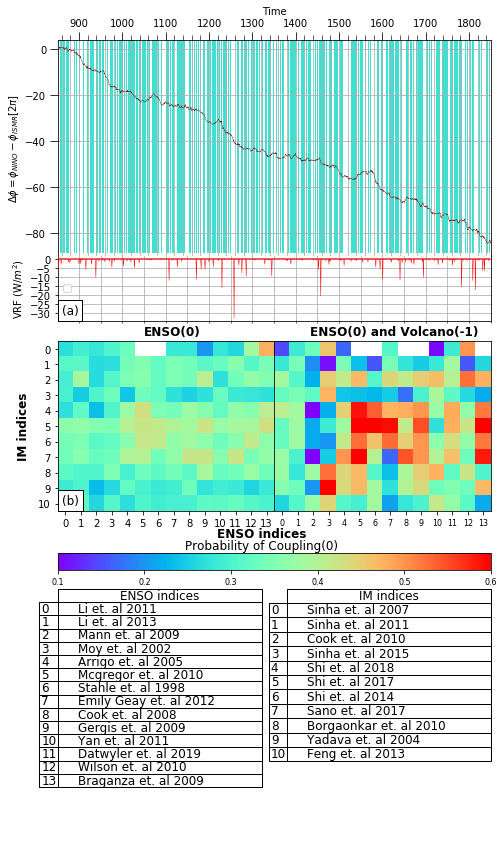

In [4]:
delphi_timeseries(ct, delphi_hist, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical,
                 delphi_hist_dist_2, delphi_hist_null_dist_2)
pl.savefig('fig1.pdf', format='pdf', dpi=1000)

In [5]:
delphi_inst = np.genfromtxt('delphi_inst.txt', delimiter=",", dtype=float)
ismr_phi_inst = np.genfromtxt('ismr_phi_inst.txt', delimiter=",", dtype=float)
nino_phi_inst = np.genfromtxt('nino3_phi_inst.txt', delimiter=",", dtype=float)
dvolc_years = np.genfromtxt('sigl_years.txt', delimiter=",", dtype=float).flatten()[::-1]
dvolc_gvf = np.genfromtxt('sigl_gvf.txt', delimiter=",", dtype=float).flatten()[::-1]
dvolc_source = np.genfromtxt('sigl_source.txt', delimiter=",", dtype=float).flatten()[::-1]

delphi_inst_grad = np.gradient(delphi_inst)
nino_phi_inst_grad = np.gradient(nino_phi_inst)
ismr_phi_inst_grad = np.gradient(ismr_phi_inst)

In [6]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(1871, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc_years, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc_years)
    time = [dt.datetime(dvolc_years[0], 1, 15)]
    for i in range(1, len(dvolc_years)):
        time.append(dt.datetime(dvolc_years[i], 1, 15))
    time = np.array(time)

    return time

ct = common_time_axis(ismr_phi_inst)
volc_time = yearly_time_axis(dvolc_years.astype(int))

In [7]:
# Bootstrapping
win = 4
nino_phi_grad_volc = []
nino_phi_grad_novolc = []
ismr_phi_grad_volc = []
ismr_phi_grad_novolc = []

for i in range(ct.shape[0]):
    for j in range(i,volc_time.shape[0]):
        cut_dt = dt.datetime(volc_time[j].year + win, volc_time[j].month, volc_time[j].day)
        if ct[i] > volc_time[j] and ct[i] < cut_dt:
            nino_phi_grad_volc.append(nino_phi_inst_grad[i])
            ismr_phi_grad_volc.append(ismr_phi_inst_grad[i])
        else:
            nino_phi_grad_novolc.append(nino_phi_inst_grad[i])
            ismr_phi_grad_novolc.append(ismr_phi_inst_grad[i])
nino_phi_grad_volc_inst = nino_phi_grad_volc
nino_phi_grad_novolc_inst = nino_phi_grad_novolc

In [8]:
def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False, rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.
    Parameters
    ----------
    x, y : array-like
    One-dimensional numeric arrays.
    ax : matplotlib.axes.Axes, optional
    Axes on which to plot. If not provided, the current axes will be used.
    quantiles : int or array-like, optional
    Quantiles to include in the plot. This can be an array of quantiles, in
    which case only the specified quantiles of `x` and `y` will be plotted.
    If this is an int `n`, then the quantiles will be `n` evenly spaced
    points between 0 and 1. If this is None, then `min(len(x), len(y))`
    evenly spaced quantiles between 0 and 1 will be computed.
    interpolation : {linear, lower, higher, midpoint, nearest}
    Specify the interpolation method used to find quantiles when `quantiles`
    is an int or None. See the documentation for numpy.quantile().
    rug : bool, optional
    If True, draw a rug plot representing both samples on the horizontal and
    vertical axes. If False, no rug plot is drawn.
    rug_length : float in [0, 1], optional
    Specifies the length of the rug plot lines as a fraction of the total
    vertical or horizontal length.
    rug_kwargs : dict of keyword arguments
    Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
    matplotlib.axes.Axes.axhline() when drawing rug plots.
    kwargs : dict of keyword arguments
    Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
    the q-q plot.
    """
# Get current axes if none are provided
    if ax is None:
        ax = plt.gca()
    if quantiles is None:
        quantiles = min(len(x), len(y))
# Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)
# Draw the rug plots if requested
    if rug:
# Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)
# Override default setting by any user-specified settings
    if rug_kwargs is not None:
        rug_x_params.update(rug_kwargs)
        rug_y_params.update(rug_kwargs)
# Draw the rug plots
    for point in x:
        ax.axvline(point, **rug_x_params)
    for point in y:
        ax.axhline(point, **rug_y_params)
# Draw the q-q plot

    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    x_vals = x_quantiles
    slope = 1
    intercept = 0
    y_vals = intercept + slope * x_vals
    print(y_quantiles.shape, y_vals.shape)
    y_vals[y_vals>y_quantiles] = np.nan
    x_vals[y_vals>y_quantiles] = np.nan
    ax.plot(x_vals, y_vals, '--', color='k')
    
def abline(slope, intercept, ax=None):
    """Plot a line from slope and intercept"""
    if not ax:
        ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, color='k')

(94,) (94,)
(94,) (94,)


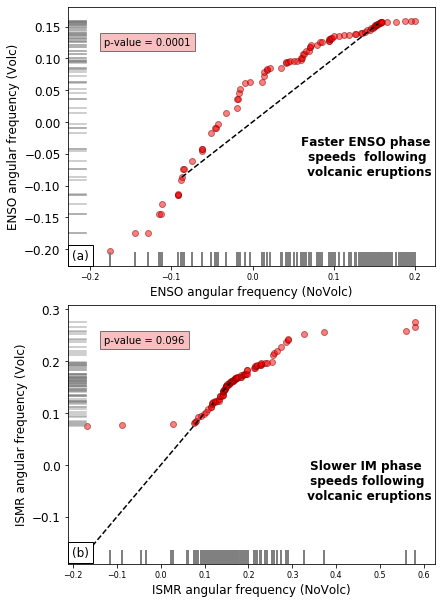

In [9]:
fig = plt.figure(figsize=[8.5, 9.0])
ax1 = fig.add_axes([0.2, 0.51, 0.6, 0.4])
ax2 = fig.add_axes([0.2, 0.05, 0.6, 0.4])

qqplot(nino_phi_grad_novolc, nino_phi_grad_volc, c='r', alpha=0.5, edgecolor='maroon', rug=True, ax=ax1)
ax1.set_xlabel('ENSO angular frequency (NoVolc)', fontsize=12)
ax1.set_ylabel('ENSO angular frequency (Volc)', fontsize=12)

qqplot(ismr_phi_grad_novolc, ismr_phi_grad_volc, c='r', alpha=0.5, edgecolor='maroon', rug=True, ax=ax2)
ax2.set_xlabel('ISMR angular frequency (NoVolc)', fontsize=12)
ax2.set_ylabel('ISMR angular frequency (Volc)', fontsize=12)

fig.text(0.69, 0.6+0.05, 'Faster ENSO phase \n speeds  following \n volcanic eruptions', ha='center', weight='bold', fontsize=12)
fig.text(0.69, 0.1+0.05, 'Slower IM phase \n speeds following \n volcanic eruptions', ha='center', weight='bold', fontsize=12)

#fig.text(0.03, 0.6+0.28, 'ENSO angular frequency (Volc)', rotation=90)
#fig.text(0.03, 0.1+0.28, 'ISMR angular frequency (Volc)', rotation=90)

fig.text(0.1, 0.85,
            "p-value = 0.0001",
            fontsize=10,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax1.transAxes,
            )

fig.text(0.1, 0.85,
            "p-value = 0.096",
            fontsize=10,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax2.transAxes,
            )
t = fig.text(0.165+0.042, 0.520, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.165+0.042, 0.0621, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#plt.title('Q-Q plot of ENSO phase speed')
#abline(1,0, ax=ax1)
plt.savefig('figs4.png', format='png', dpi=1000)
#plt.show()
#plt.close()

(94,) (94,)


<Figure size 288x288 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


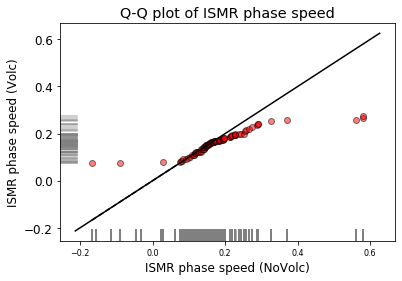

In [10]:
# Draw quantile-quantile plot with rug plot
plt.figure(figsize=(4,4))
plt.figure()
qqplot(ismr_phi_grad_novolc, ismr_phi_grad_volc, c='r', alpha=0.5, edgecolor='k', rug=True)
plt.xlabel('ISMR phase speed (NoVolc)')
plt.ylabel('ISMR phase speed (Volc)')
plt.title('Q-Q plot of ISMR phase speed')
abline(1,0)
plt.show()
plt.close()

In [26]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
ismr_phi_hist = np.genfromtxt('ismr_phi_hist.csv', delimiter=",", dtype=float)
nino_phi_hist = np.genfromtxt('nino_phi_hist.csv', delimiter=",", dtype=float)

delphi_hist_grad = np.gradient(delphi_hist)
nino_phi_hist_grad = np.gradient(nino_phi_hist)
ismr_phi_hist_grad = np.gradient(ismr_phi_hist)

ct = common_time_axis(ismr_phi_hist)
volc_time = yearly_time_axis(dvolc_years.astype(int))

In [27]:
# Bootstrapping
win = 4
nino_phi_grad_volc = []
nino_phi_grad_novolc = []
ismr_phi_grad_volc = []
ismr_phi_grad_novolc = []

for i in range(ct.shape[0]):
    for j in range(i,volc_time.shape[0]):
        cut_dt = dt.datetime(volc_time[j].year + win, volc_time[j].month, volc_time[j].day)
        if ct[i] > volc_time[j] and ct[i] < cut_dt:
            nino_phi_grad_volc.append(nino_phi_hist_grad[i])
            ismr_phi_grad_volc.append(ismr_phi_hist_grad[i])
        else:
            nino_phi_grad_novolc.append(nino_phi_hist_grad[i])
            ismr_phi_grad_novolc.append(ismr_phi_hist_grad[i])
            
nino_phi_grad_volc_hist = nino_phi_grad_volc
nino_phi_grad_novolc_hist = nino_phi_grad_novolc

(94,) (94,)
(94,) (94,)


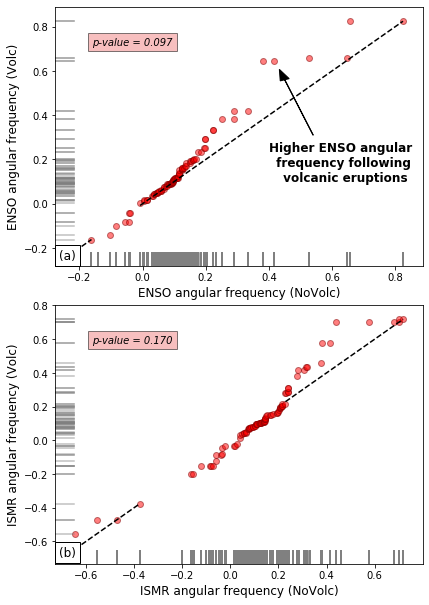

In [33]:
fig = plt.figure(figsize=[8.5, 9.0])
ax1 = fig.add_axes([0.2, 0.51, 0.6, 0.4])
ax2 = fig.add_axes([0.2, 0.05, 0.6, 0.4])

qqplot(nino_phi_grad_novolc, nino_phi_grad_volc, c='r', alpha=0.5, edgecolor='maroon', rug=True, ax=ax1)
ax1.set_xlabel('ENSO angular frequency (NoVolc)', fontsize=12)
ax1.set_ylabel('ENSO angular frequency (Volc)', fontsize=12)

qqplot(ismr_phi_grad_novolc, ismr_phi_grad_volc, c='r', alpha=0.5, edgecolor='maroon', rug=True, ax=ax2)
ax2.set_xlabel('ISMR angular frequency (NoVolc)', fontsize=12)
ax2.set_ylabel('ISMR angular frequency (Volc)', fontsize=12)

#fig.text(0.69+0.05, 0.6+0.08, 'Faster')
# fig.text(0.4+0.05, 0.65+0.05, 'Higher ENSO', ha='left', fontsize=10)#, weight='bold')
# fig.text(0.4+0.05-0.02, 0.625+0.05, 'angular frequency ', ha='left', fontsize=10)#, weight='bold')
# fig.text(0.3+0.05, 0.6+0.05, 'following volcanic', ha='left', fontsize=10)#, weight='bold')
# fig.text(0.4+0.05, 0.6+0.05-0.025, 'eruptions', ha='left', fontsize=10)#, weight='bold')
#fig.text(0.69+0.05, 0.1+0.05, 'Nonsignificant \n change in IM phase \n speeds following \n volcanic eruptions', ha='center', weight='bold')

#fig.text(0.03, 0.6+0.28, 'ENSO angular frequency (Volc)', rotation=90)
#fig.text(0.03, 0.1+0.28, 'ISMR angular frequency (Volc)', rotation=90)
fig.text(0.67, 0.6+0.04, 'Higher ENSO angular \n frequency following \n volcanic eruptions', ha='center', weight='bold', fontsize=12)

fig.text(0.1, 0.85,
            "p-value = 0.097",
            fontsize=10,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax1.transAxes,
            style='italic'
            )

fig.text(0.1, 0.85,
            "p-value = 0.170",
            fontsize=10,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax2.transAxes,
            style='italic'
            )
t = fig.text(0.165+0.041, 0.520, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.165+0.041, 0.0618, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

ax1.arrow(0.54, 0.31, -0.09, 0.25, head_width=0.03, head_length=0.05, fc='k', ec='k')
#plt.title('Q-Q plot of ENSO phase speed')
#abline(1,0, ax=ax1)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(10)
plt.savefig('fig2.png', format='png', dpi=1000)
#plt.show()
#plt.close()

(94,) (94,)


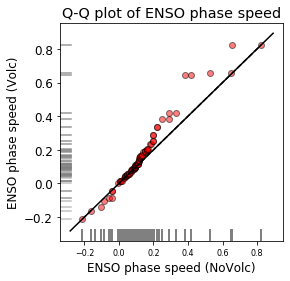

In [76]:
plt.figure(figsize=(4,4))
qqplot(nino_phi_grad_novolc, nino_phi_grad_volc, c='r', alpha=0.5, edgecolor='k', rug=True)
plt.xlabel('ENSO phase speed (NoVolc)')
plt.ylabel('ENSO phase speed (Volc)')
plt.title('Q-Q plot of ENSO phase speed')
abline(1,0)
plt.show()
plt.close()

(94,) (94,)


<Figure size 288x288 with 0 Axes>

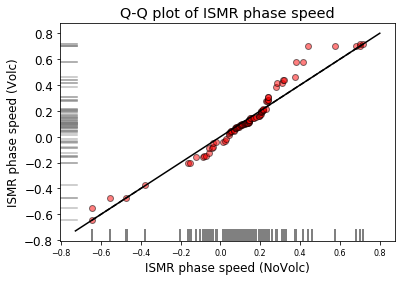

In [77]:
# Draw quantile-quantile plot with rug plot
plt.figure(figsize=(4,4))
plt.figure()
qqplot(ismr_phi_grad_novolc, ismr_phi_grad_volc, c='r', alpha=0.5, edgecolor='k', rug=True)
plt.xlabel('ISMR phase speed (NoVolc)')
plt.ylabel('ISMR phase speed (Volc)')
plt.title('Q-Q plot of ISMR phase speed')
abline(1,0)
plt.show()
plt.close()

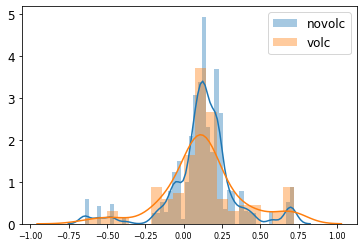

In [78]:
import seaborn as sns
sns.distplot(ismr_phi_grad_novolc, label="novolc")
sns.distplot(ismr_phi_grad_volc, label="volc")
plt.legend()

In [79]:
from scipy import stats
ismr_phi_grad_volc = np.asarray(ismr_phi_grad_volc).flatten()
ismr_phi_grad_novolc = np.asarray(ismr_phi_grad_novolc).flatten()
print(stats.ks_2samp(ismr_phi_grad_volc, ismr_phi_grad_novolc))

Ks_2sampResult(statistic=0.1134862174646494, pvalue=0.16814426768074764)


In [80]:
from scipy import stats
nino_phi_grad_volc = np.asarray(nino_phi_grad_volc).flatten()
nino_phi_grad_novolc = np.asarray(nino_phi_grad_novolc).flatten()
print(stats.ks_2samp(nino_phi_grad_volc, nino_phi_grad_novolc))

Ks_2sampResult(statistic=0.12576508306616146, pvalue=0.09633094228535388)


In [11]:
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')

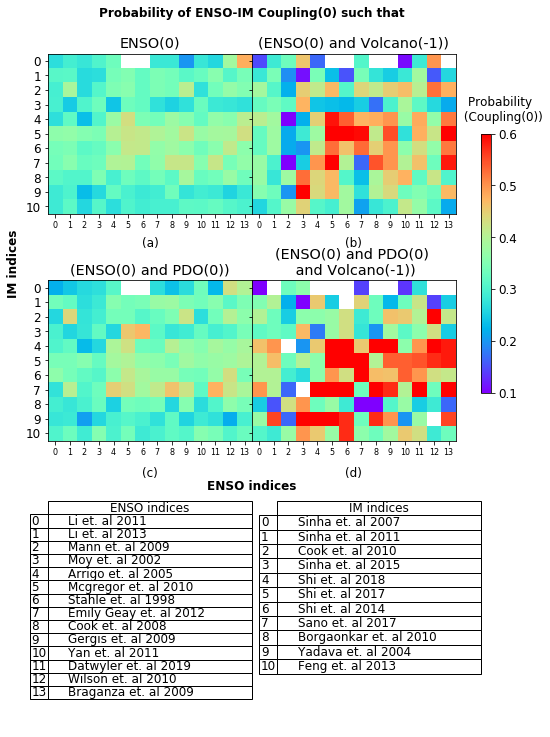

In [12]:
import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 

font = {'family' : 'normal',
        'size'   : 12}

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

pl.rc('font', **font)

fig = pl.figure(figsize=[7.08, 9.0])
ax1 = fig.add_axes([0.1, 0.15, 0.4, 0.4])
ax2 = fig.add_axes([0.5, 0.15, 0.4, 0.4])
ax3 = fig.add_axes([0.1, 0.5, 0.4, 0.4])
ax4 = fig.add_axes([0.5, 0.5, 0.4, 0.4])
ax5 = fig.add_axes([0.1, -0.22, 0.4, 0.4])
ax6 = fig.add_axes([0.55, -0.20, 0.4, 0.4])


im = ax3.imshow(p_coupling_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax3.set_title('ENSO(0)')

im = ax4.imshow(p_coupling_st_volc_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax4.set_title('(ENSO(0) and Volcano(-1))')

im = ax1.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax1.set_title('(ENSO(0) and PDO(0))')

im = ax2.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax2.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')

for ax in [ax3,ax4]:
    ax.set_xticks(ticks=np.arange(14))
    #ax.set_xticklabels(xticklabels, rotation=45)
ax3.set_yticks(ticks=np.arange(11))
#ax3.set_yticklabels(yticklabels)

for ax in [ax1,ax2]:
    ax.set_xticks(ticks=np.arange(14))
ax1.set_yticks(ticks=np.arange(11))
#ax1.set_yticklabels(yticklabels)

fig.text(0.5, 0.15, 'ENSO indices', ha='center', weight='bold')
fig.text(0.5, 0.88, 'Probability of ENSO-IM Coupling(0) such that', ha='center', weight='bold')
fig.text(0.02, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')

fig.text(0.3, 0.525, '(a)', ha='center')
fig.text(0.7, 0.525, '(b)', ha='center')
fig.text(0.3, 0.17, '(c)', ha='center')
fig.text(0.7, 0.17, '(d)', ha='center')

fig.text(0.99, 0.72, 'Probability \n (Coupling(0))', ha='center')

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_clim(vmin=0.1, vmax=0.6)

for ax in [ax2,ax4, ax5, ax6]:
    pl.setp( ax.get_yticklabels(), visible=False)

for ax in [ax5, ax6]:
    pl.setp( ax.get_xticklabels(), visible=False)
    ax.axis('off')

df = pd.DataFrame(xticklabels, columns = ['ENSO indices']) 
ytable = ax5.table(cellText=df.values, colLabels=df.columns, loc='center', rowLabels=df.index, cellLoc='left')
ytable.scale(1, 1.1)

df_ = pd.DataFrame(yticklabels, columns = ['IM indices']) 
ytable = ax6.table(cellText=df_.values, colLabels=df_.columns, loc='center', rowLabels=df_.index, cellLoc='left')
ytable.scale(1, 1.2)

In [13]:
ens1 = nc.Dataset('sst_ocean_1968_1970_anom_nino3_fldmean.nc')
ens1_2x = nc.Dataset('sst_ocean_1968_1970_monmean_2x_volc_anom_nino3_fldmean.nc')
ens1_4x = nc.Dataset('sst_ocean_1968_1970_monmean_4x_volc_anom_nino3_fldmean.nc')

ens2 = nc.Dataset('sst_ocean_1979_1981_anom_nino3_fldmean.nc')
ens3 = nc.Dataset('sst_ocean_2051_2053_anom_nino3_fldmean.nc')
ens3_025x = nc.Dataset('sst_ocean_2051_2053_monmean_0.25x_volc_anom_nino3_fldmean.nc')
ens3_050x = nc.Dataset('sst_ocean_2051_2053_monmean_0.5x_volc_anom_nino3_fldmean.nc')


ens4 = nc.Dataset('sst_ocean_2061_2063_anom_nino3_fldmean.nc')
ens5 = nc.Dataset('sst_ocean_2062_2064_anom_nino3_fldmean.nc')
ens6 = nc.Dataset('sst_ocean_2073_2075_anom_nino3_fldmean.nc')
ens7 = nc.Dataset('sst_ocean_2104_2106_anom_nino3_fldmean.nc')
ens8 = nc.Dataset('sst_ocean_2128_2130_anom_nino3_fldmean.nc')
ens8_025x = nc.Dataset('sst_ocean_2128_2130_monmean_0.25x_volc_anom_nino3_fldmean.nc')
ens8_050x = nc.Dataset('sst_ocean_2128_2130_monmean_0.5x_volc_anom_nino3_fldmean.nc')


ens9 = nc.Dataset('sst_ocean_2200_2202_anom_nino3_fldmean.nc')
ens10 = nc.Dataset('sst_ocean_2238_2240_anom_nino3_fldmean.nc')

sst1 = ens1.variables['sst'][0:36,0,0]
sst1_2x = ens1_2x.variables['sst'][0:36,0,0]
sst1_4x = ens1_4x.variables['sst'][0:36,0,0]


sst2 = ens2.variables['sst'][0:36,0,0]
sst3 = ens3.variables['sst'][0:36,0,0]
sst3_025x = ens3_025x.variables['sst'][0:36,0,0]
sst3_050x = ens3_050x.variables['sst'][0:36,0,0]

sst4 = ens4.variables['sst'][0:36,0,0]
sst5 = ens5.variables['sst'][0:36,0,0]
sst6 = ens6.variables['sst'][0:36,0,0]
sst7 = ens7.variables['sst'][0:36,0,0]
sst8 = ens8.variables['sst'][0:36,0,0]
sst8_025x = ens8_025x.variables['sst'][0:36,0,0]
sst8_050x = ens8_050x.variables['sst'][0:36,0,0]

sst9 = ens9.variables['sst'][0:36,0,0]
sst10 = ens10.variables['sst'][0:36,0,0]

ens1.close()
ens1_2x.close()
ens1_4x.close()

ens2.close()
ens3.close()
ens3_025x.close()
ens3_050x.close()


ens4.close()
ens5.close()
ens6.close()
ens7.close()
ens8.close()
ens8_025x.close()
ens8_050x.close()

ens9.close()
ens10.close()

volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)

In [14]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(1, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time
#time = common_time_axis(sst1)
time = np.arange(36)

In [15]:
sst1n = np.ma.filled(sst1.astype(float), np.nan)

[1883.  1883.5 1884.  1884.5 1885.  1885.5 1886. ]


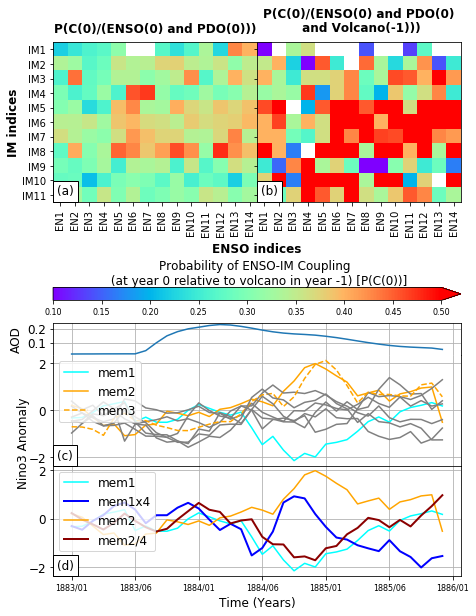

In [16]:
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')
n = 1883
fig = plt.figure(figsize=(7.08,9))
ax1 = fig.add_axes([0.1, 0.05+0.17+0.17, 0.8, 0.05],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.05+0.17, 0.8, 0.17], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.17])
ax4 = fig.add_axes([0.1, 0.55, 0.4, 0.4])
ax5 = fig.add_axes([0.5, 0.55, 0.4, 0.4], yticklabels=[])

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

im = ax4.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax4.set_title('(ENSO(0) and PDO(0))')
fig.text(0.3, 0.89, 'P(C(0)/(ENSO(0) and PDO(0)))', ha='center', weight='bold')

im = ax5.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax5.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')
fig.text(0.7, 0.89, 'P(C(0)/(ENSO(0) and PDO(0)\n and Volcano(-1)))', ha='center', weight='bold')
for ax in [ax4,ax5]:
    ax.set_xticks(ticks=np.arange(14))
ax4.set_yticks(ticks=np.arange(11))

fig.text(0.5, 0.55, 'ENSO indices', ha='center', weight='bold')
fig.text(0.01, 0.75, 'IM indices', va='center', rotation='vertical', weight='bold')
    
cbar_ax = fig.add_axes([0.1, 0.635-0.16, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)
fig.text(0.5, 0.5, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')

dummy = np.zeros(sst1.shape[0])
dummy_mean = np.zeros(sst1.shape[0])
dummy_std = np.zeros(sst1.shape[0])
ax2.grid()
ax2.plot(time/12+n, sst1, label = 'mem1', color = 'cyan') # La Nina state
#ax2.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
#ax2.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'blue')

ax3.plot(time/12+n, sst1, label = 'mem1', color = 'cyan') # La Nina state
#ax3.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
ax3.plot(time/12+n, sst1_4x, label = 'mem1x4', lw=2, color = 'blue')


#plt.plot(time/12+n, sst2, label = 'ens2')
ax2.plot(time/12+n, sst3, label = 'mem2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3, label = 'mem2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3_025x, label = 'mem2/4', lw=2, color = 'darkred')
print(np.arange(time[0]/12+n,time[-1]/12+n+6/12,6/12))
ax3.set_xticks(np.arange(time[0]/12+n,time[-1]/12+n+6/12,6/12))
ax3.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'])

#ax3.set_xticks(time[::])
#ax3.set_xticks(np.arange(min(time[0]), max(time[-1]), 6))
#ax3.set_xticks()
#ax3.plot(time/12+n, sst3_050x, label = 'ens2_0.50x', lw=4, marker="D", markersize=12, color = 'cyan')

ax2.plot(time/12+n, sst4, color = 'gray')
ax2.plot(time/12+n, sst5, color = 'gray')
ax2.plot(time/12+n, sst6, color = 'gray')
ax2.plot(time/12+n, sst7, color = 'gray')
ax2.plot(time/12+n, sst8,'--', color = 'orange', label = 'mem3') # El Nino state
#ax2.plot(time/12+n, sst8_025x, label = 'ens7_0.25x', lw=4, marker="s", markersize=12, color = 'magenta')
#ax2.plot(time/12+n, sst8_050x, label = 'ens7_0.50x', lw=4, marker="P", markersize=12, color = 'yellow')
ax2.plot(time/12+n, sst9, color = 'gray')
ax2.plot(time/12+n, sst10, color = 'gray')
for i in range(dummy.shape[0]):
    dummy_mean[i] = np.mean((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    dummy_std[i] = np.std((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    

dummy[:] = dummy_mean + dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
dummy[:]= dummy_mean - dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
ax2.legend(loc='upper left')
#lt.plot(0, dummy,"black")
ax1.plot(time/12+n,volc_aod_10)
ax1.grid()
#ax2.set_ylabel("Nino3 anomaly")
#ax3.set_ylabel("Nino3 anomaly")
ax1.set_ylabel("AOD")
ax3.set_xlabel("Time (Years)")
ax3.grid()
ax3.legend(loc='upper left')

ax4.set_xticklabels(xticklabels, rotation=90)
ax5.set_xticklabels(xticklabels, rotation=90)
ax4.set_yticklabels(yticklabels)

t = fig.text(0.108, 0.06, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.06+0.17, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = fig.text(0.108, 0.0608+0.4, '(c', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.638, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108+0.4, 0.638, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

fig.text(0.03, 0.11+0.08, 'Nino3 Anomaly', fontsize=12, rotation=90)

#for ax in [ax4]:
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
    label.set_fontsize(10)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
pl.savefig('fig3.pdf', format='pdf', dpi=1000)

In [17]:
import numpy as np
import datetime as dt
from scipy.stats import pearsonr
nino_hist = np.genfromtxt('../data/tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_nino3_tseries.csv', delimiter=",", dtype=float).flatten()-273.15
ismr_hist = np.genfromtxt('../data/pr_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_goswami_india_tseries.csv', delimiter=",", dtype=float).flatten()*86400
nino_hist = (nino_hist - np.mean(nino_hist))/np.std(nino_hist)
ismr_hist = (ismr_hist - np.mean(ismr_hist))/np.std(ismr_hist)
yy = np.arange(850,1851,1/12)

In [28]:
beg = yy>1401
end = yy<1412
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.645864491330411, 6.18214610029817e-17)


In [29]:
beg = yy>1630
end = yy<1641
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.5953860319022559, 5.0987846755887115e-14)


In [30]:
beg = yy>1715
end = yy<1726
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.6409296390198318, 1.2596277614647522e-16)


In [31]:
nino_hist = np.genfromtxt('ismr_1871_2016.csv', delimiter=",", dtype=float).flatten()
ismr_hist = np.genfromtxt('nino3_1871_2016.csv', delimiter=",", dtype=float).flatten()
for i in range(12):
    nino_hist[i::12] = (nino_hist[i::12] - np.mean(nino_hist[i::12]))/np.std(nino_hist[i::12])
    ismr_hist[i::12] = (ismr_hist[i::12] - np.mean(ismr_hist[i::12]))/np.std(ismr_hist[i::12])
yy = np.arange(1871,2017,1/12)

In [32]:
beg = yy>1871
end = yy<2017
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.07980198689226517, 0.0008310007971089335)


In [33]:
beg = yy>1888
end = yy<1898
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.2599402347027692, 0.004141787757927015)


In [34]:
beg = yy>1965
end = yy<1975
idx = beg*end
nino_hist_sample = nino_hist[idx]
ismr_hist_sample = ismr_hist[idx]
print(pearsonr(nino_hist_sample, ismr_hist_sample))

(-0.2646645494860844, 0.003487006274781553)


In [35]:
# Seasonal Mean ISMR and NINO3
nino_jun = nino_hist[6::12]
nino_jul = nino_hist[7::12]
nino_aug = nino_hist[8::12]
nino_sep = nino_hist[9::12]

ismr_jun = ismr_hist[6::12]
ismr_jul = ismr_hist[7::12]
ismr_aug = ismr_hist[8::12]
ismr_sep = ismr_hist[9::12]

nino_jjas = np.zeros((nino_jun.shape[0]))
ismr_jjas = np.zeros((ismr_jun.shape[0]))
for i in range(nino_jjas.shape[0]):
    nino_jjas[i] = np.mean((nino_jun[i],nino_jul[i],nino_aug[i],nino_sep[i]))
    ismr_jjas[i] = np.mean((ismr_jun[i],ismr_jul[i],ismr_aug[i],ismr_sep[i]))

In [36]:
print(pearsonr(nino_jjas, ismr_jjas))

(-0.5113628328430504, 4.234660161150949e-11)


In [15]:
import matplotlib.image as mpimg
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical, 
                     delphi_hist_dist_2, delphi_hist_null_dist_2):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    
    label_size = 8
    mpl.rcParams['xtick.labelsize'] = label_size 

    font = {'family' : 'normal',
        'size'   : 12}

    xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
    xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

    yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

    yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

    pl.rc('font', **font)
    
    # set up figure
    fig = pl.figure(figsize=[8.5, 11.0])
    axlabfs, tiklabfs, splabfs = 4, 4, 4
    start_year = 851
    end_year = 1850

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.12, 0.75-0.03 +0.05-0.02,0.85, 0.2])
    ax1.plot(ct, del_phi/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
    ax1.bar(te,
            width = 100 * np.ones(len(te)),
            height = (yhi - ylo) * np.ones(len(te)),
            bottom = ylo * np.ones(len(te)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1, alpha=0.6 )
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.12, 0.6-0.075+0.15+0.05, 0.85, 0.075-0.02-0.02])
    ax3 = fig.add_axes([0.12, 0.2+0.17+0.05, 0.425, 0.3])
    ax4 = fig.add_axes([0.545, 0.2+0.17+0.05, 0.425, 0.3])
    ax5 = fig.add_axes([0.32, 0.05, 0.4, 0.22],projection=ccrs.PlateCarree())
    
    #ax5 = fig.add_axes([0.1, 0.0, 0.4, 0.4])
    #ax6 = fig.add_axes([0.55, 0.015, 0.4, 0.4])

    ax2.plot(volc_time[:1000], dvolc_tropical[:1000],zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_nh[:1000], zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_sh[:1000],  zorder=5, linewidth=0.5, color='red')
    
    im = ax3.imshow(p_coupling_paleo, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
    #ax3.set_title('ENSO(0)', fontsize=16)
    fig.text(0.345, 0.495+0.163+0.05, 'P(C(0)/ENSO(0))', ha='center', weight='bold')
    
    im = ax4.imshow(p_coupling_st_volc_paleo, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
    #ax4.set_title('ENSO(0) and Volcano(-1)')
    fig.text(0.78, 0.495+0.163+0.05, 'P(C(0)/(ENSO(0) and Volcano(-1)))', ha='center', weight='bold')
    
    for ax in [ax3,ax4]:
        ax.set_xticks(ticks=np.arange(14))
    #ax.set_xticklabels(xticklabels, rotation=45)
        ax3.set_yticks(ticks=np.arange(11))
    #ax3.set_yticklabels(yticklabels)
    
    ax4.set_yticks([])
    
    #for ax in [ax5, ax6]:
    #    pl.setp( ax.get_xticklabels(), visible=False)
    #    ax.axis('off')

    #df = pd.DataFrame(xticklabels, columns = ['ENSO indices']) 
    #ytable = ax5.table(cellText=df.values, colLabels=df.columns, loc='center', rowLabels=df.index, cellLoc='left')
    #ytable.scale(1, 1.1)

    #df_ = pd.DataFrame(yticklabels, columns = ['IM indices']) 
    #ytable = ax6.table(cellText=df_.values, colLabels=df_.columns, loc='center', rowLabels=df_.index, cellLoc='left')
    #ytable.scale(1, 1.2)
    
    fig.text(0.52, 0.14+0.165+0.06, 'ENSO indices', ha='center', weight='bold')
    fig.text(0.04, 0.2+0.15+0.165+0.05, 'IM indices', va='center', rotation='vertical', weight='bold')
    
    #cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
    cbar_ax = fig.add_axes([0.12, 0.07+0.169+0.06, 0.85, 0.02])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
    cbar.set_clim(vmin=0.1, vmax=0.5)
    
    fig.text(0.52, 0.07+0.03+0.169+0.06, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')
    #cbar.ax.set_xticklabels( rotation='vertical')
    
    t = fig.text(0.128, 0.6-0.075+0.011+0.167+0.032, '(a)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    
    t = fig.text(0.128, 0.2+0.029+0.167+0.055, '(b)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
    
    t = fig.text(0.327, 0.058, '(c)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    ax2.legend(loc='center left',  prop={'size': 10})
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    ax1.set_ylim(-90, 4)
    ax1.xaxis.tick_top()
    
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    #ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel("$\Delta\phi$ = \n $\phi_{NINO} - \phi_{ISMR}[2\pi]$")
    ax1.set_xlabel("Time", fontsize=10)
    #pl.rcParams.update({'font.size': 12})
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)

    ax1.xaxis.set_label_position('top') 


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_ylabel("VRF \n (W/$m^2$)", fontsize=axlabfs)
    ax2.xaxis.set_label_position('bottom')
    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    for ax in ([ax1, ax2, ax3, ax4]):
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
           ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(12)
    
    ax3.set_xticklabels(xticklabels, rotation=90)
    ax4.set_xticklabels(xticklabels, rotation=90)
    ax3.set_yticklabels(yticklabels)
    imagefile = 'figure_nh_cooling.eps'
    #img=mpimg.imread(imagefile)
    #ax5.imshow(img, interpolation='nearest', aspect='auto')
    #ax5.axis('off')
    data_dir = 'sigl.nc'  # daily
    ds_nh_cool = xr.open_dataset(data_dir)
    im = ds_nh_cool.tsurf.sel(lat=slice(50,-9)).sel(lon=slice(148,60)).plot(ax=ax5, vmin=-1.0, vmax=1.0, extend='both', cmap='coolwarm', add_colorbar=False)
    ax5.set_title('')
    ax5.coastlines()
    ax5.set_aspect('auto')
    cax_nh = fig.add_axes([0.75, 0.06 , 0.015, 0.2])
    cb = fig.colorbar(im, extend='both', cax=cax_nh)
    #cb.set_label(label='JJA SAT anomaly [K]', size='large', weight='bold')
    cb.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
    cb.ax.tick_params(labelsize='large')
    
    for ax in [ax5]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
        gl = ax.gridlines()
        gl.ylines = False
        gl.xlines = False   
        gl.xlocator = mticker.FixedLocator([60,  90, 120, 150])
        gl.xlabels_bottom = True
        gl.ylabels_left = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    
#     gl = ax5.gridlines()
#     gl.xlabels_bottom = True
#     gl.ylabels_left = True
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time



dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))

is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])


idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]
volc_time = yearly_time_axis(dvolc)
# 5 year window after volcanic eruption selected
print(dvolc.shape)

(1001,)


No handles with labels found to put in legend.


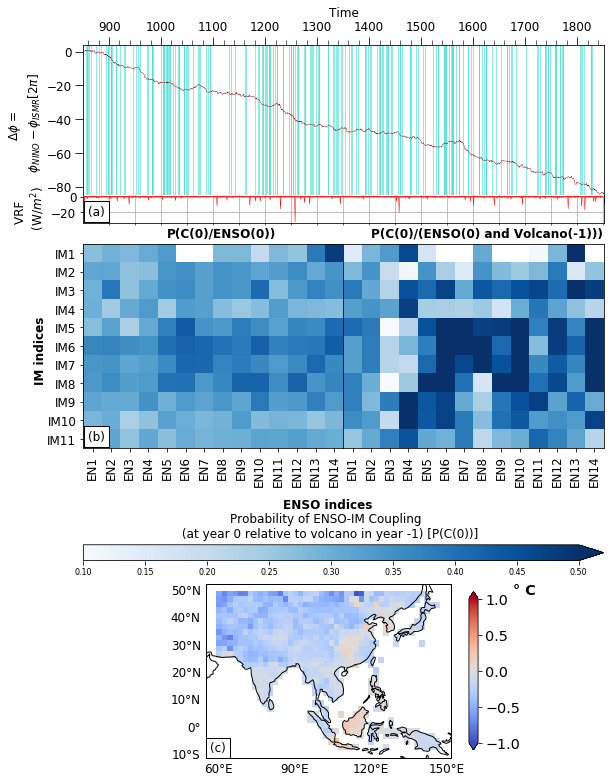

In [16]:
#delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
#delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('psync.txt', delimiter=",", dtype=float).flatten()

# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')

delphi_timeseries(ct, delphi_hist, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical,
                 delphi_hist_dist_2, delphi_hist_null_dist_2)
pl.savefig('fig1_review.png', format='png', dpi=1000)

In [42]:
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')


In [43]:
np.sum(p_coupling_paleo<p_coupling_st_volc_paleo)

94

In [44]:
p_coupling_paleo.shape[0]*p_coupling_paleo.shape[1]

154

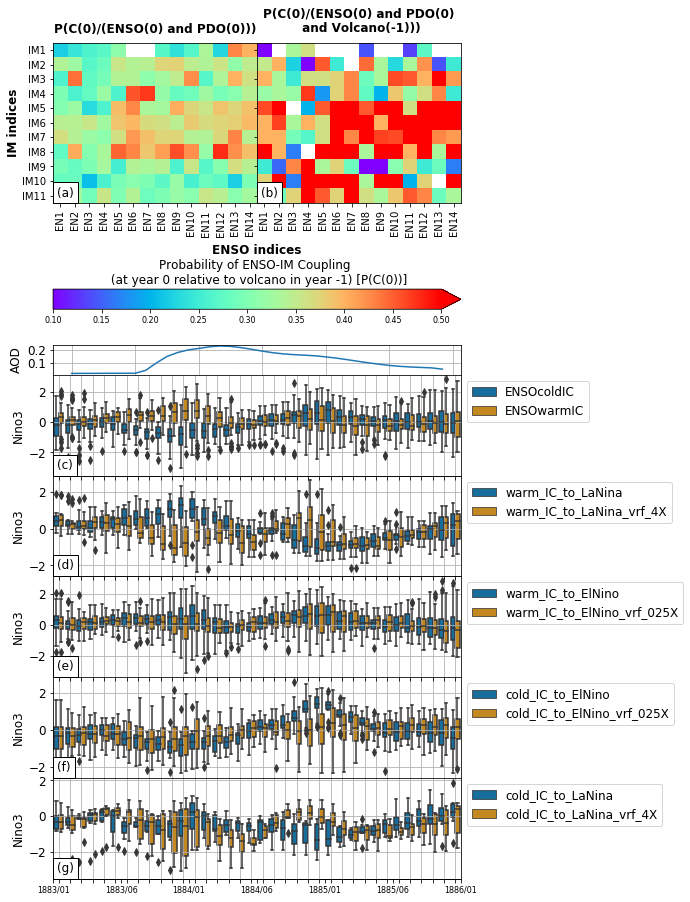

In [45]:
from load_data_state_of_system import *
import seaborn as sns
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')
n = 1883
fig = plt.figure(figsize=(7.08,14))
ax1 = fig.add_axes([0.1, 0.05+0.1+0.3+0.1, 0.8, 0.03],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax3_ = fig.add_axes([0.1, 0.05, 0.8, 0.0])

ax4 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax5 = fig.add_axes([0.5, 0.6, 0.4, 0.4], yticklabels=[])

ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.05+0.1+0.3, 0.8, 0.1], xticklabels=[])

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

im = ax4.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax4.set_title('(ENSO(0) and PDO(0))')
fig.text(0.3, 0.89, 'P(C(0)/(ENSO(0) and PDO(0)))', ha='center', weight='bold')

im = ax5.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax5.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')
fig.text(0.7, 0.89, 'P(C(0)/(ENSO(0) and PDO(0)\n and Volcano(-1)))', ha='center', weight='bold')
for ax in [ax4,ax5]:
    ax.set_xticks(ticks=np.arange(14))
ax4.set_yticks(ticks=np.arange(11))

fig.text(0.5, 0.67, 'ENSO indices', ha='center', weight='bold')
fig.text(0.01, 0.8, 'IM indices', va='center', rotation='vertical', weight='bold')
    
cbar_ax = fig.add_axes([0.1, 0.635-0.16+0.14, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)
fig.text(0.5, 0.64, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')

###############################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

count = 0

for i in range(c_sst.shape[0]):
    for j in range(c_sst.shape[1]):
        df.loc[count] = [c_sst[i,j], j, 'ENSOcoldIC']
        count = count + 1
        
for i in range(w_sst.shape[0]):
    for j in range(w_sst.shape[1]):
        df.loc[count] = [w_sst[i,j], j, 'ENSOwarmIC']
        count = count + 1



sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax8)

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

count = 0

for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df.loc[count] = [w_sst_4x_o[i,j], j, 'warm_IC_to_LaNina']
        count = count + 1
        
for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df.loc[count] = [w_sst_4x[i,j], j, 'warm_IC_to_LaNina_vrf_4X']
        count = count + 1



sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax7)

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

count = 0

for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df.loc[count] = [w_sst_025x_o[i,j], j, 'warm_IC_to_ElNino']
        count = count + 1

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df.loc[count] = [w_sst_025x[i,j], j, 'warm_IC_to_ElNino_vrf_025X']
        count = count + 1



sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax6)

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

count = 0

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df.loc[count] = [c_sst_025x_o[i,j], j, 'cold_IC_to_ElNino']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df.loc[count] = [c_sst_025x[i,j], j, 'cold_IC_to_ElNino_vrf_025X']
        count = count + 1



sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax2)

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

count = 0

for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df.loc[count] = [c_sst_4x_o[i,j], j, 'cold_IC_to_LaNina']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df.loc[count] = [c_sst_4x[i,j], j, 'cold_IC_to_LaNina_vrf_4X']
        count = count + 1



sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax3)

###############################


ax1.plot(time/12+n,volc_aod_10)
ax1.grid()

ax1.set_ylabel("AOD")


ax4.set_xticklabels(xticklabels, rotation=90)
ax5.set_xticklabels(xticklabels, rotation=90)
ax4.set_yticklabels(yticklabels)

t = fig.text(0.108, 0.057, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.057+0.1, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.057+0.2, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.057+0.3, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.057+0.4, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108, 0.738-0.011,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.108+0.4, 0.738-0.011, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

#for ax in [ax4]:
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
    label.set_fontsize(10)
    
for ax in [ax6,ax7,ax8]:
    ax.set(xticklabels=[])
for ax in [ax2, ax3, ax6, ax7, ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
    #ax.legend(loc='lower left')
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    

#ax3.set_xticks([])
ax3.xaxis.set_ticklabels([])
ax3.xaxis.grid(True)
ax3_.set_yticks([])
ax3_.set_xticks(np.linspace(0,1,7))
ax3_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'])

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
pl.savefig('fig3.pdf', format='pdf', dpi=1000)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


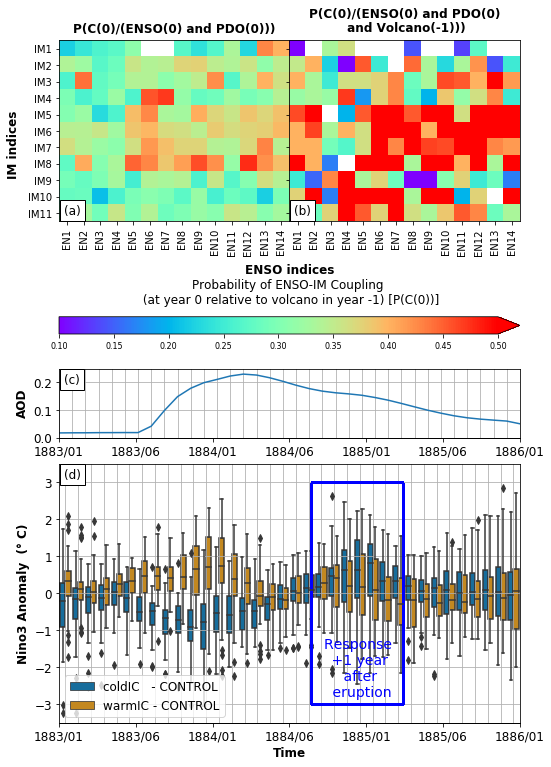

In [46]:
from load_data_state_of_system import *
import seaborn as sns
import matplotlib.ticker as ticker
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')
n = 1883
fig = plt.figure(figsize=(8.0,12))
ax1 = fig.add_axes([0.1, 0.43, 0.8, 0.08],
                   xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.3], xticklabels=[])

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

im = ax4.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax4.set_title('(ENSO(0) and PDO(0))')
fig.text(0.3, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)))', ha='center', weight='bold')

im = ax5.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax5.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')
fig.text(0.7, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)\n and Volcano(-1)))', ha='center', weight='bold')
for ax in [ax4,ax5]:
    ax.set_xticks(ticks=np.arange(14))
ax4.set_yticks(ticks=np.arange(11))

fig.text(0.5, 0.53+0.03+0.06, 'ENSO indices', ha='center', weight='bold')
fig.text(0.01, 0.8-0.08+0.05, 'IM indices', va='center', rotation='vertical', weight='bold')
    
cbar_ax = fig.add_axes([0.1, 0.55, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)
fig.text(0.5, 0.635-0.16+0.14-0.12+0.02+0.07, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')

###############################
df = pd.DataFrame(columns=['Nino3 (\N{DEGREE SIGN} C)', 'time', 'type'])

count = 0

for i in range(c_sst.shape[0]):
    for j in range(c_sst.shape[1]):
        df.loc[count] = [c_sst[i,j], j, 'coldIC   - CONTROL']
        count = count + 1
        
for i in range(w_sst.shape[0]):
    for j in range(w_sst.shape[1]):
        df.loc[count] = [w_sst[i,j], j, 'warmIC - CONTROL']
        count = count + 1



b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax8)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


ax4.set_xticklabels(xticklabels, rotation=90)
ax5.set_xticklabels(xticklabels, rotation=90)
ax4.set_yticklabels(yticklabels)



t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, 5.67, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, 3.1, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

#for ax in [ax4]:
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
    label.set_fontsize(10)
    
for ax in [ax8]:
    ax.set(xticklabels=[])
for ax in [ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
    ax.legend(loc='lower left')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
ax1.margins(0)
ax1.set_xlabel('')
ax1.set_ylabel('AOD', weight='bold', fontsize=12)
ax1.yaxis.grid(True) 
ax1.xaxis.grid(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])
ax8.xaxis.set_ticklabels([])
#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax1_, ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
ax1.set(ylim=(0.0, 0.25))
ax1_.set_xlabel('')


ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

pl.savefig('fig3.png', format='png', dpi=1000)

In [47]:
df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1 
    #print(i)
print(time.shape[0])

36


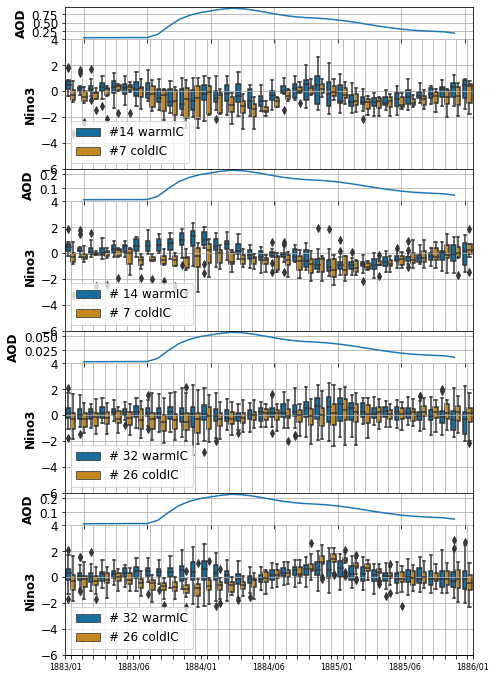

In [48]:
from load_data_state_of_system import *
import seaborn as sns
n = 1883
fig = plt.figure(figsize=(7.08,10))

ax_ = fig.add_axes([0.1, 0.05, 0.8, 0.0])

ax2 = fig.add_axes([0.1, 0.23+3*0.045+2*0.18, 0.8, 0.18], xticklabels=[])
ax1 = fig.add_axes([0.1, 0.23+3*0.045+3*0.18, 0.8, 0.045], xticklabels=[])

ax3 = fig.add_axes([0.1, 0.23+2*0.045+0.18, 0.8, 0.18], xticklabels=[])
ax4 = fig.add_axes([0.1, 0.23+2*0.045+2*0.18, 0.8, 0.045], xticklabels=[])

ax5 = fig.add_axes([0.1, 0.23+0.045, 0.8, 0.18], xticklabels=[])
ax6 = fig.add_axes([0.1, 0.23+0.045+0.18, 0.8, 0.045], xticklabels=[])

ax7 = fig.add_axes([0.1, 0.05, 0.8, 0.18], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.23, 0.8, 0.045], xticklabels=[])


#####################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count = 0

for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df.loc[count] = [w_sst_4x[i,j], j, '#14 warmIC']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df.loc[count] = [c_sst_4x[i,j], j, '#7 coldIC']
        count = count + 1

b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax2)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0
for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df.loc[count] = [w_sst_4x_o[i,j], j, '# 14 warmIC']
        count = count + 1
for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df.loc[count] = [c_sst_4x_o[i,j], j, '# 7 coldIC']
        count = count + 1    
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax3)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df.loc[count] = [w_sst_025x[i,j], j, '# 32 warmIC']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df.loc[count] = [c_sst_025x[i,j], j, '# 26 coldIC']
        count = count + 1
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax5)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

########################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0

for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df.loc[count] = [w_sst_025x_o[i,j], j, '# 32 warmIC']
        count = count + 1

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df.loc[count] = [c_sst_025x_o[i,j], j, '# 26 coldIC']
        count = count + 1
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax7)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################
# for i in range(w_sst_4x_o.shape[0]):
#     for j in range(w_sst_4x_o.shape[1]):
#         df.loc[count] = [w_sst_4x_o[i,j], j, 'warm_IC_to_LaNina']
#         count = count + 1
        
# for i in range(w_sst_4x.shape[0]):
#     for j in range(w_sst_4x.shape[1]):
#         df.loc[count] = [w_sst_4x[i,j], j, 'warm_IC_to_LaNina_vrf_4X']
#         count = count + 1



# sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax7)

# df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

# count = 0

# for i in range(w_sst_025x_o.shape[0]):
#     for j in range(w_sst_025x_o.shape[1]):
#         df.loc[count] = [w_sst_025x_o[i,j], j, 'warm_IC_to_ElNino']
#         count = count + 1

# for i in range(w_sst_025x.shape[0]):
#     for j in range(w_sst_025x.shape[1]):
#         df.loc[count] = [w_sst_025x[i,j], j, 'warm_IC_to_ElNino_vrf_025X']
#         count = count + 1



# sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax6)

# df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

# count = 0

# for i in range(c_sst_025x_o.shape[0]):
#     for j in range(c_sst_025x_o.shape[1]):
#         df.loc[count] = [c_sst_025x_o[i,j], j, 'cold_IC_to_ElNino']
#         count = count + 1

# for i in range(c_sst_025x.shape[0]):
#     for j in range(c_sst_025x.shape[1]):
#         df.loc[count] = [c_sst_025x[i,j], j, 'cold_IC_to_ElNino_vrf_025X']
#         count = count + 1



# sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax2)

# df = pd.DataFrame(columns=['Nino3', 'time', 'type'])

# count = 0

# for i in range(c_sst_4x_o.shape[0]):
#     for j in range(c_sst_4x_o.shape[1]):
#         df.loc[count] = [c_sst_4x_o[i,j], j, 'cold_IC_to_LaNina']
#         count = count + 1

# for i in range(c_sst_4x.shape[0]):
#     for j in range(c_sst_4x.shape[1]):
#         df.loc[count] = [c_sst_4x[i,j], j, 'cold_IC_to_LaNina_vrf_4X']
#         count = count + 1



# sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax3)

###############################


ax1.plot(time/12+n,volc_aod_10*4)
ax1.grid()

ax1.set_ylabel("AOD", weight="bold")


ax4.plot(time/12+n,volc_aod_10)
ax4.grid()

ax4.set_ylabel("AOD", weight="bold")

ax6.plot(time/12+n,volc_aod_10/4)
ax6.grid()

ax6.set_ylabel("AOD", weight="bold")

ax8.plot(time/12+n,volc_aod_10)
ax8.grid()

ax8.set_ylabel("AOD", weight="bold")

# t = fig.text(0.108, 0.057, '(g)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = fig.text(0.108, 0.057+0.1, '(f)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = fig.text(0.108, 0.057+0.2, '(e)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = fig.text(0.108, 0.057+0.3, '(d)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax1.text(0.0, 0.0, '(c)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))



# #for ax in [ax4]:
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
#     label.set_fontsize(10)
    
for ax in [ax2, ax3, ax5, ax7]:
    ax.set(xticklabels=[])
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
    ax.legend(loc='lower left')
    ax.set(ylim=(-6, 4))
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    

#ax3.set_xticks([])
ax.xaxis.set_ticklabels([])
ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

import matplotlib
matplotlib.rc('font', **font)

for ax in [ax1, ax4, ax6, ax8]:
    ax.spines['bottom'].set_visible(False)
for ax in [ax2, ax3, ax5, ax7]:
    ax.spines['top'].set_visible(False)


pl.savefig('fig4.pdf', format='pdf', dpi=1000)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


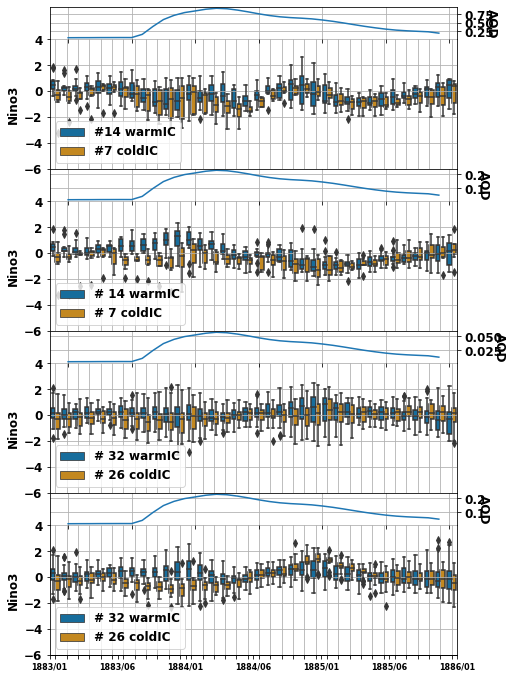

In [49]:
from load_data_state_of_system import *
import seaborn as sns
n = 1883
fig = plt.figure(figsize=(7.08,10))

ax_ = fig.add_axes([0.1, 0.05, 0.8, 0.0])

ax2 = fig.add_axes([0.1, 0.23+3*0.045+2*0.18, 0.8, 0.18], xticklabels=[])
ax1 = fig.add_axes([0.1, 0.23+3*0.045+3*0.18, 0.8, 0.045], xticklabels=[])

ax3 = fig.add_axes([0.1, 0.23+2*0.045+0.18, 0.8, 0.18], xticklabels=[])
ax4 = fig.add_axes([0.1, 0.23+2*0.045+2*0.18, 0.8, 0.045], xticklabels=[])

ax5 = fig.add_axes([0.1, 0.23+0.045, 0.8, 0.18], xticklabels=[])
ax6 = fig.add_axes([0.1, 0.23+0.045+0.18, 0.8, 0.045], xticklabels=[])

ax7 = fig.add_axes([0.1, 0.05, 0.8, 0.18], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.23, 0.8, 0.045], xticklabels=[])


#####################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count = 0

for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df.loc[count] = [w_sst_4x[i,j], j, '#14 warmIC']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df.loc[count] = [c_sst_4x[i,j], j, '#7 coldIC']
        count = count + 1

b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax2)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################

df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0
for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df.loc[count] = [w_sst_4x_o[i,j], j, '# 14 warmIC']
        count = count + 1
for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df.loc[count] = [c_sst_4x_o[i,j], j, '# 7 coldIC']
        count = count + 1    
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax3)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df.loc[count] = [w_sst_025x[i,j], j, '# 32 warmIC']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df.loc[count] = [c_sst_025x[i,j], j, '# 26 coldIC']
        count = count + 1
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax5)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

########################################################################
df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
count=0

for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df.loc[count] = [w_sst_025x_o[i,j], j, '# 32 warmIC']
        count = count + 1

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df.loc[count] = [c_sst_025x_o[i,j], j, '# 26 coldIC']
        count = count + 1
b = sns.boxplot(y='Nino3', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax7)
b.set_ylabel("Nino3",fontsize=12, weight="bold")




ax1.plot(time/12+n,volc_aod_10*4)
ax1.grid()

#ax1.set_ylabel("AOD", weight="bold")


ax4.plot(time/12+n,volc_aod_10)
ax4.grid()

#ax4.set_ylabel("AOD", weight="bold")

ax6.plot(time/12+n,volc_aod_10/4)
ax6.grid()

#ax6.set_ylabel("AOD", weight="bold")

ax8.plot(time/12+n,volc_aod_10)
ax8.grid()

#ax8.set_ylabel("AOD", weight="bold")


for ax in [ax2, ax3, ax5, ax7]:
    ax.set(xticklabels=[])
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
    ax.legend(loc='lower left')
    ax.set(ylim=(-6, 4))
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    

#ax3.set_xticks([])
ax.xaxis.set_ticklabels([])
ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

import matplotlib
matplotlib.rc('font', **font)

for ax in [ax1, ax4, ax6, ax8]:
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel("AOD", weight="bold", rotation=270)
for ax in [ax2, ax3, ax5, ax7]:
    ax.spines['top'].set_visible(False)


pl.savefig('fig4.pdf', format='pdf', dpi=1000)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


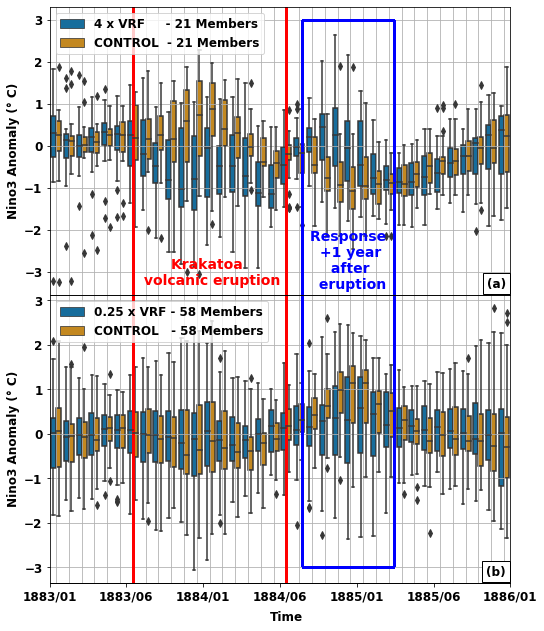

In [50]:
from load_data_state_of_system import *
import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,10))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])

# ax5 = fig.add_axes([0.1, 0.23+0.045*2, 0.8, 0.18], xticklabels=[])
# ax6 = fig.add_axes([0.1, 0.23+0.045*2+0.18*2, 0.8, 0.045], xticklabels=[])

# ax7 = fig.add_axes([0.1, 0.05, 0.8, 0.18*2], xticklabels=[])
# ax8 = fig.add_axes([0.1, 0.23, 0.8, 0.045*2], xticklabels=[])


#####################################################################
df = pd.DataFrame(columns=['Nino3', 'Time', 'type'])
count = 0

for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df.loc[count] = [w_sst_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df.loc[count] = [c_sst_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df.loc[count] = [w_sst_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1
for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df.loc[count] = [c_sst_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1    

b = sns.boxplot(y='Nino3', x='Time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax2)
b.set_ylabel("Nino3 Anomaly (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

#####################################################################

# df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
# count=0
# for i in range(w_sst_4x_o.shape[0]):
#     for j in range(w_sst_4x_o.shape[1]):
#         df.loc[count] = [w_sst_4x_o[i,j], j, '# 14 warmIC']
#         count = count + 1
# for i in range(c_sst_4x_o.shape[0]):
#     for j in range(c_sst_4x_o.shape[1]):
#         df.loc[count] = [c_sst_4x_o[i,j], j, '# 7 coldIC']
#         count = count + 1    
# b = sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax3)
# b.set_ylabel("Nino3",fontsize=12, weight="bold")

#####################################################################
df = pd.DataFrame(columns=['Nino3', 'Time', 'type'])
count=0

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df.loc[count] = [w_sst_025x[i,j], j, '0.25 x VRF - 58 Members']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df.loc[count] = [c_sst_025x[i,j], j, '0.25 x VRF - 58 Members']
        count = count + 1
        
for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df.loc[count] = [w_sst_025x_o[i,j], j, 'CONTROL   - 58 Members']
        count = count + 1

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df.loc[count] = [c_sst_025x_o[i,j], j, 'CONTROL   - 58 Members']
        count = count + 1
        
b = sns.boxplot(y='Nino3', x='Time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax1)
b.set_ylabel("Nino3 Anomaly (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

########################################################################
# df = pd.DataFrame(columns=['Nino3', 'time', 'type'])
# count=0

# for i in range(w_sst_025x_o.shape[0]):
#     for j in range(w_sst_025x_o.shape[1]):
#         df.loc[count] = [w_sst_025x_o[i,j], j, '# 32 warmIC']
#         count = count + 1

# for i in range(c_sst_025x_o.shape[0]):
#     for j in range(c_sst_025x_o.shape[1]):
#         df.loc[count] = [c_sst_025x_o[i,j], j, '# 26 coldIC']
#         count = count + 1
# b = sns.boxplot(y='Nino3', x='time', 
#                  data=df, 
#                  palette="colorblind",
#                  hue='type', ax=ax7)
# b.set_ylabel("Nino3",fontsize=12, weight="bold")




# ax1.plot(time/12+n,volc_aod_10*4)
# ax1.grid()

# #ax1.set_ylabel("AOD", weight="bold")


# ax4.plot(time/12+n,volc_aod_10)
# ax4.grid()

# #ax4.set_ylabel("AOD", weight="bold")

# ax6.plot(time/12+n,volc_aod_10/4)
# ax6.grid()

# #ax6.set_ylabel("AOD", weight="bold")

# ax8.plot(time/12+n,volc_aod_10)
# ax8.grid()

# #ax8.set_ylabel("AOD", weight="bold")


# for ax in [ax2, ax3, ax5, ax7]:
#     ax.set(xticklabels=[])
#     #ax.set_ylabel('')    
#     ax.set_xlabel('')
#     ax.yaxis.grid(True) 
#     ax.xaxis.grid(True)
#     ax.legend(loc='lower left')
#     ax.set(ylim=(-6, 4))
#     #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
for ax in [ax1, ax2]:
    ax.legend(loc='upper left')
    ax.set_xlabel('')
ax1.text(18.0, -4.2, 'Time', ha='center', weight='bold')

t = ax2.text(33.7, -3.37,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax1.text(33.6, -3.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# #ax3.set_xticks([])
for ax in [ax1, ax2]:
    ax.xaxis.set_ticklabels([])
    ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
ax1.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
#ax1.axhline(y=3.05, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')

#ax2.axhline(y=-3.3, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')
ax2.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

ax1.axvline(x=19.2, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')
ax1.axvline(x=26.4, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')

ax2.axvline(x=19.2, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')
ax2.axvline(x=26.4, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')

ax2.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')
ax1.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')

ax2.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
ax1.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

ax2.text(12,-3.3,'Krakatoa \n volcanic eruption', color='r', fontsize=14,horizontalalignment='center')

ax2.text(23,-3.4,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
ax1.xaxis.set_ticks_position('none') 
ax2.xaxis.set_ticks_position('none') 

for ax in [ax1,ax2]:
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
pl.savefig('fig4.png', format='png', dpi=1000)

load successfull


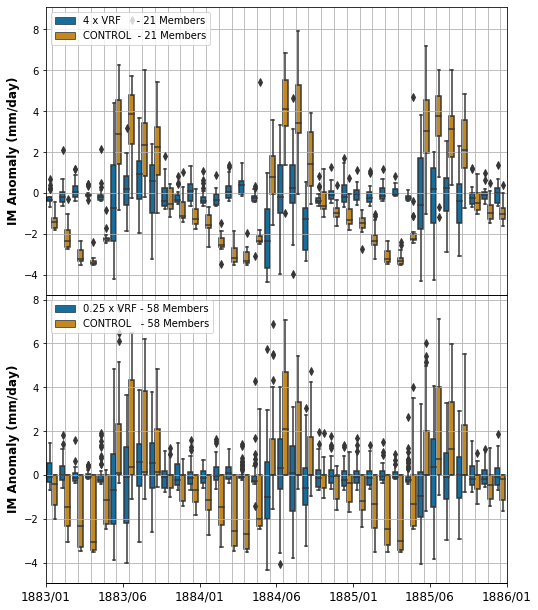

In [3]:
from importlib import reload
from load_data_state_of_system_pr import *
time = np.arange(36)

import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,10))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])


df = pd.DataFrame(columns=['IM', 'Time', 'type'])
count = 0

for i in range(w_pr_4x.shape[0]):
    for j in range(w_pr_4x.shape[1]):
        df.loc[count] = [w_pr_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(c_pr_4x.shape[0]):
    for j in range(c_pr_4x.shape[1]):
        df.loc[count] = [c_pr_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(w_pr_4x_o.shape[0]):
    for j in range(w_pr_4x_o.shape[1]):
        df.loc[count] = [w_pr_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1
for i in range(c_pr_4x_o.shape[0]):
    for j in range(c_pr_4x_o.shape[1]):
        df.loc[count] = [c_pr_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1    

b = sns.boxplot(y='IM', x='Time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax2)
b.set_ylabel("IM Anomaly (mm/day)",fontsize=12, weight="bold")


df = pd.DataFrame(columns=['IM', 'Time', 'type'])
count=0

for i in range(w_pr_025x.shape[0]):
    for j in range(w_pr_025x.shape[1]):
        df.loc[count] = [w_pr_025x[i,j], j, '0.25 x VRF - 58 Members']
        count = count + 1

for i in range(c_pr_025x.shape[0]):
    for j in range(c_pr_025x.shape[1]):
        df.loc[count] = [c_pr_025x[i,j], j, '0.25 x VRF - 58 Members']
        count = count + 1
        
for i in range(w_pr_025x_o.shape[0]):
    for j in range(w_pr_025x_o.shape[1]):
        df.loc[count] = [w_pr_025x_o[i,j], j, 'CONTROL   - 58 Members']
        count = count + 1

for i in range(c_pr_025x_o.shape[0]):
    for j in range(c_pr_025x_o.shape[1]):
        df.loc[count] = [c_pr_025x_o[i,j], j, 'CONTROL   - 58 Members']
        count = count + 1
        
b = sns.boxplot(y='IM', x='Time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax1)
b.set_ylabel("IM Anomaly (mm/day)",fontsize=12, weight="bold")


    
for ax in [ax1, ax2]:
    ax.legend(loc='upper left')
    ax.set_xlabel('')
# ax1.text(18.0, -4.2, 'Time', ha='center', weight='bold')

# t = ax2.text(33.7, -3.37,'(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax1.text(33.6, -3.18, '(b)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# #ax3.set_xticks([])
for ax in [ax1, ax2]:
    ax.xaxis.set_ticklabels([])
    ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
# ax1.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# #ax1.axhline(y=3.05, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')

# #ax2.axhline(y=-3.3, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')
# ax2.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax1.axvline(x=19.2, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')
# ax1.axvline(x=26.4, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')

# ax2.axvline(x=19.2, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')
# ax2.axvline(x=26.4, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')

# ax2.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')
# ax1.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')

# ax2.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
# ax1.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

# ax2.text(12,-3.3,'Krakatoa \n volcanic eruption', color='r', fontsize=14,horizontalalignment='center')

# ax2.text(23,-3.4,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
ax1.xaxis.set_ticks_position('none') 
ax2.xaxis.set_ticks_position('none') 

for ax in [ax1,ax2]:
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
pl.savefig('fig5.pdf', format='pdf', dpi=1000)

In [4]:
# So no response when we decrease the forcing, but when we increase it we can clearly see reduction in IM anomaly

[Text(0, 0, '1883/01'),
 Text(0, 0, '1883/06'),
 Text(0, 0, '1884/01'),
 Text(0, 0, '1884/06'),
 Text(0, 0, '1885/01'),
 Text(0, 0, '1885/06'),
 Text(0, 0, '1886/01')]

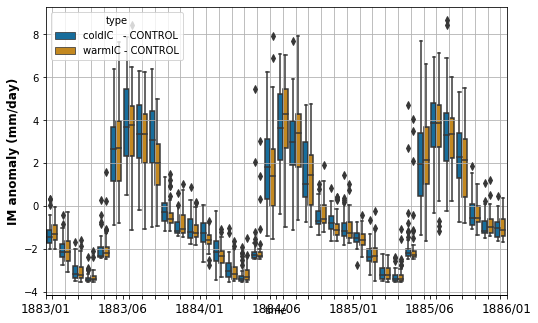

In [9]:
from importlib import reload
from load_data_state_of_system_pr import *
time = np.arange(36)

import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,5))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])


###############################
df = pd.DataFrame(columns=['IM', 'time', 'type'])

count = 0

for i in range(c_pr.shape[0]):
    for j in range(c_pr.shape[1]):
        df.loc[count] = [c_pr[i,j], j, 'coldIC   - CONTROL']
        count = count + 1
        
for i in range(w_pr.shape[0]):
    for j in range(w_pr.shape[1]):
        df.loc[count] = [w_pr[i,j], j, 'warmIC - CONTROL']
        count = count + 1



b = sns.boxplot(y='IM', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax1)
b.set_ylabel("IM anomaly (mm/day)",fontsize=12, weight="bold")
for ax in [ax1]:
    ax.xaxis.set_ticklabels([])
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)

In [11]:
# SST - Indian Monsoon plot for control and 4x VRF
# generate an ensemble mean file for both SST and IM rainfall and plot 

In [51]:
import xarray as xr

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

# PI control data
#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/ATM/MON/pr_merged_1921-2250.nc
#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/ATM/MON/precip_2093-2314_monmean.nc

#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/OCN/SST/sst_ocean_2210-2224_monmean.nc
#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/OCN/SST_NEW1/sst_ocean_monmean_2093_2124.nc
#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/OCN/SST/sst_ocean_2093-2190_monmean.nc
#/iitm1/cccr/sandeep/iitm-esm-preind-volcano/iitm-esm-cmip6/work/PREINDUSTRIAL-AERO_swap/OUTPUT/OCN/SST_NEW/sst_ocean_2200-50_monmean.nc
#SST1/
#SST2/
#SST_NEW/
#SST_NEW1/


In [52]:
ds_sst_4x

<xarray.Dataset>
Dimensions:   (time: 37, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 1958-01-31T12:00:00 ... 1961-01-01T12:00:00
Data variables:
    sst       (time, yt_ocean, xt_ocean) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.4 (http://c...
    history:                   Mon Mar 16 18:08:28 2020: cdo ensmean 4x/anom_...
    Conventions:               CF-1.4
    filename:                  ocean_1958_01_01.nc
    title:                     MOM4ICE
    grid_type:                 regular
    grid_tile:                 N/A
    NCO:                       4.4.2
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.6.4 (http://c...

In [53]:
# Only control
# Take composite of 21 members composite of 58 members
# for sst and precipitation and take the difference of both of them

In [54]:
ds = xr.open_mfdataset('/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/fldmean_nino3_anom_sst_*')

In [55]:
nino3 = np.zeros((50,36))
for i in range(nino3.shape[0]):
    nino3[i,:] = ds.sst.values[36*i:36*(i+1),0,0]

In [25]:
time = np.arange(36)

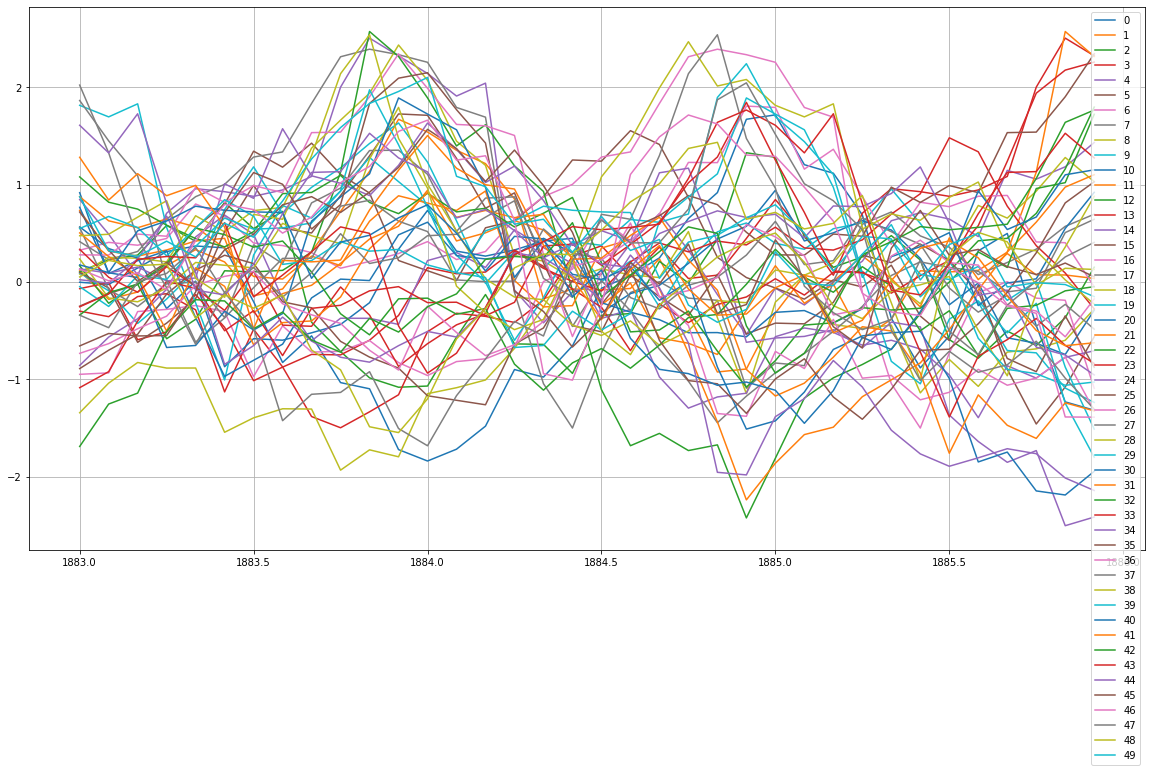

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(nino3.shape[0]):
    plt.plot(time/12+1883, nino3[i], label=str(i))
plt.grid()
plt.legend()

In [30]:
import xarray as xr

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

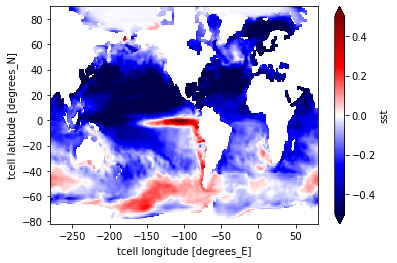

In [39]:
sst_diff = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')
sst_diff.plot(vmin=-0.5, vmax=0.5, cmap='seismic')

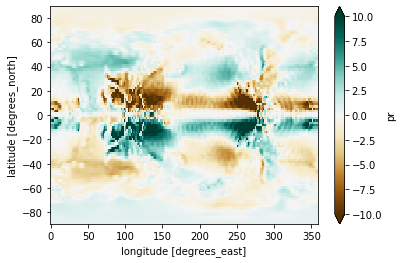

In [44]:
pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
pr_diff.plot(vmin=-10,vmax=10,cmap='BrBG')

In [56]:
import cartopy.crs as ccrs
import xarray as xr

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_rsdscs_rsuscs_tas_4x_minus_control.nc"
ds_flux = xr.open_dataset(dir_)

ds_sfc = ds_flux.rsdscs - ds_flux.rsuscs

tas_4x = ds_flux.tas.isel(time=slice(23,36)).mean(dim='time')
sst_diff = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

sst_tas = sst_diff
for i in range(sst_diff.shape[0]):
    for j in range(sst_diff.shape[1]):
        if np.isnan(sst_diff.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff.xt_ocean.values[j]>0:
                sst_tas[i,j] = tas_4x.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j], method='nearest')
            else:
                sst_tas[i,j] = tas_4x.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j]+360, method='nearest')



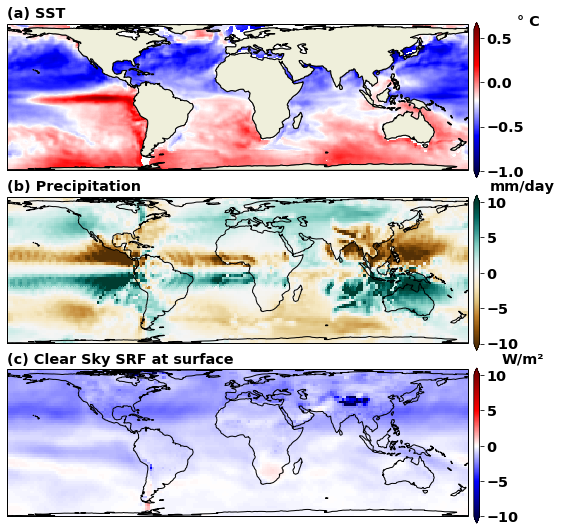

In [66]:
import cartopy as cart
sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.05,0.05,0.8,0.3],projection=ccrs.LambertCylindrical())
ax2 = fig.add_axes([0.05,0.35,0.8,0.3],projection=ccrs.LambertCylindrical())
ax3 = fig.add_axes([0.05,0.65,0.8,0.3],projection=ccrs.LambertCylindrical())

im3 = sst_diff1.plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False)

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
im2 = pr_diff.plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False)


im1 = ds_sfc.isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False)
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.06, 0.01, 0.27])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.1, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.36, 0.01, 0.27])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.1, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.27])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

ax1.text(-180.0,62., '(c) Clear Sky SRF at surface', size='large', weight='bold')
ax2.text(-180.0,62., '(b) Precipitation', size='large', weight='bold')
ax3.text(-180.0,62., '(a) SST', size='large', weight='bold')
pl.savefig('fig5.png', format='png', dpi=1000)

(1001,)


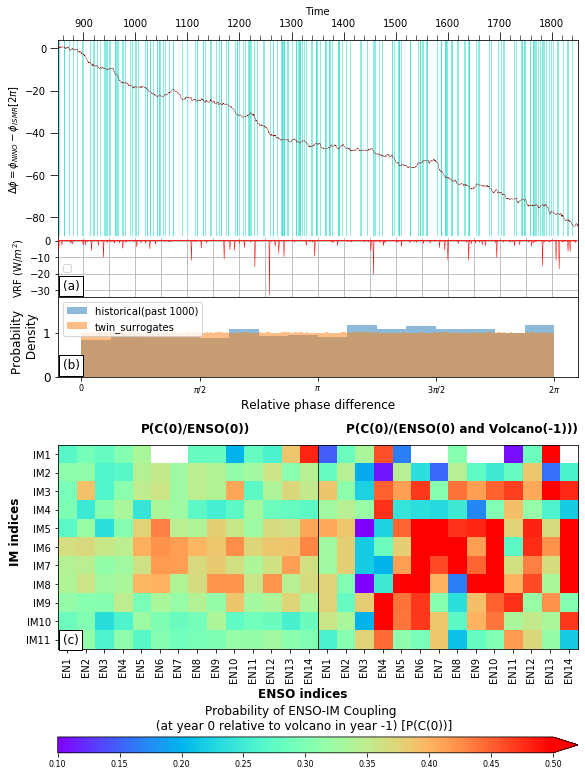

In [15]:
def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical, 
                     delphi_hist_dist_2, delphi_hist_null_dist_2):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    
    label_size = 8
    mpl.rcParams['xtick.labelsize'] = label_size 

    font = {'family' : 'normal',
        'size'   : 12}

    xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
    xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

    yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

    yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

    pl.rc('font', **font)
    
    # set up figure
    fig = pl.figure(figsize=[8.5, 11.0])
    axlabfs, tiklabfs, splabfs = 4, 4, 4
    start_year = 851
    end_year = 1850

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.1, 0.7, 0.85, 0.25])
    ax1.plot(ct, del_phi/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
    ax1.bar(te,
            width = 100 * np.ones(len(te)),
            height = (yhi - ylo) * np.ones(len(te)),
            bottom = ylo * np.ones(len(te)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1, alpha=0.6 )
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.1, 0.6-0.075+0.1, 0.85, 0.075])
    ax5 = fig.add_axes([0.1, 0.6-0.075, 0.85, 0.1])
    ax3 = fig.add_axes([0.1, 0.2-0.04, 0.425, 0.3])
    ax4 = fig.add_axes([0.525, 0.2-0.04, 0.425, 0.3])
    #ax5 = fig.add_axes([0.1, 0.0, 0.4, 0.4])
    #ax6 = fig.add_axes([0.55, 0.015, 0.4, 0.4])

    ax2.plot(volc_time[:1000], dvolc_tropical[:1000],zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_nh[:1000], zorder=5, linewidth=0.5, color='red')
    ax2.plot(volc_time[:1000], dvolc_sh[:1000],  zorder=5, linewidth=0.5, color='red')
    
    im = ax3.imshow(p_coupling_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
    #ax3.set_title('ENSO(0)', fontsize=16)
    fig.text(0.325, 0.495-0.04, 'P(C(0)/ENSO(0))', ha='center', weight='bold')
    
    im = ax4.imshow(p_coupling_st_volc_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
    #ax4.set_title('ENSO(0) and Volcano(-1)')
    fig.text(0.76, 0.495-0.04, 'P(C(0)/(ENSO(0) and Volcano(-1)))', ha='center', weight='bold')
    
    for ax in [ax3,ax4]:
        ax.set_xticks(ticks=np.arange(14))
    #ax.set_xticklabels(xticklabels, rotation=45)
        ax3.set_yticks(ticks=np.arange(11))
    #ax3.set_yticklabels(yticklabels)
    
    ax4.set_yticks([])
    
    values_hist, bins_hist, _ = ax5.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='historical(past 1000)', range=(0,1))
    values_hist_null, bins_hist_null, _ = ax5.hist(delphi_hist_null_dist_2, normed=True, bins='fd', alpha=0.5, label='twin_surrogates', range=(0,1))

    ax5.set_xlabel('Relative phase difference')
    ax5.set_ylabel('Probability  \n Density')
    ax5.legend(prop={'size': 10})
    ax5.set_xticks(np.arange(0, 1.1, step=0.25))
    ax5.set_xticklabels(['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
    ax5.set_ylim([0,1.8])

    
    fig.text(0.5, 0.14-0.02, 'ENSO indices', ha='center', weight='bold')
    fig.text(0.02, 0.2+0.15-0.02, 'IM indices', va='center', rotation='vertical', weight='bold')
    
    #cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
    cbar_ax = fig.add_axes([0.1, 0.07-0.02, 0.85, 0.02])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
    cbar.set_clim(vmin=0.1, vmax=0.5)
    
    fig.text(0.5, 0.07+0.03-0.02, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')
    #cbar.ax.set_xticklabels( rotation='vertical')
    
    t = fig.text(0.108, 0.6-0.075+0.01+0.1, '(a)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    t = fig.text(0.108, 0.6-0.075+0.01, '(b)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    
    t = fig.text(0.108, 0.2+0.028-0.04, '(c)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

    ax2.legend(loc='center left',  prop={'size': 10})
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    ax1.set_ylim(-90, 4)
    ax1.xaxis.tick_top()
    
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    #ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel(r"$\Delta\phi = \phi_{NINO} - \phi_{ISMR}[2\pi]$", fontsize=12)
    ax1.set_xlabel("Time", fontsize=10)
    #pl.rcParams.update({'font.size': 12})
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)

    ax1.xaxis.set_label_position('top') 


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_ylabel("VRF (W/$m^2$)", fontsize=12)
    ax2.xaxis.set_label_position('bottom')
    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    for ax in ([ax1, ax2, ax3, ax4]):
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
           ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(10)
    
    ax3.set_xticklabels(xticklabels, rotation=90)
    ax4.set_xticklabels(xticklabels, rotation=90)
    ax3.set_yticklabels(yticklabels)
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time

delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('psync.txt', delimiter=",", dtype=float).flatten()

# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')

dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))

is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])


idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]
volc_time = yearly_time_axis(dvolc)
# 5 year window after volcanic eruption selected
print(dvolc.shape)


# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )



delphi_timeseries(ct, delphi_hist, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical,
                 delphi_hist_dist_2, delphi_hist_null_dist_2)
pl.savefig('fig1.pdf', format='pdf', dpi=1000)

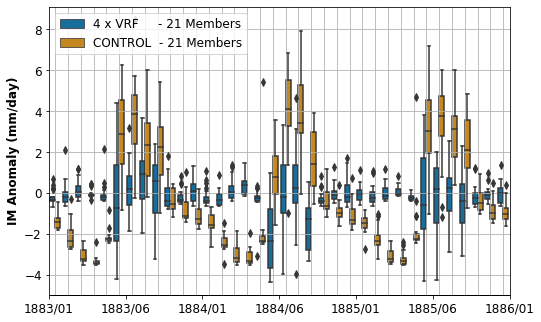

In [18]:
from importlib import reload
from load_data_state_of_system_pr import *
time = np.arange(36)

import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,5))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])


df = pd.DataFrame(columns=['IM', 'Time', 'type'])
count = 0

for i in range(w_pr_4x.shape[0]):
    for j in range(w_pr_4x.shape[1]):
        df.loc[count] = [w_pr_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(c_pr_4x.shape[0]):
    for j in range(c_pr_4x.shape[1]):
        df.loc[count] = [c_pr_4x[i,j], j, '4 x VRF     - 21 Members']
        count = count + 1

for i in range(w_pr_4x_o.shape[0]):
    for j in range(w_pr_4x_o.shape[1]):
        df.loc[count] = [w_pr_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1
for i in range(c_pr_4x_o.shape[0]):
    for j in range(c_pr_4x_o.shape[1]):
        df.loc[count] = [c_pr_4x_o[i,j], j, 'CONTROL  - 21 Members']
        count = count + 1    

b = sns.boxplot(y='IM', x='Time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax1)
b.set_ylabel("IM Anomaly (mm/day)",fontsize=12, weight="bold")





    
for ax in [ax1]:
    ax.legend(loc='upper left')
    ax.set_xlabel('')
# ax1.text(18.0, -4.2, 'Time', ha='center', weight='bold')

# t = ax2.text(33.7, -3.37,'(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax1.text(33.6, -3.18, '(b)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# #ax3.set_xticks([])
for ax in [ax1]:
    ax.xaxis.set_ticklabels([])
    ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
# ax1.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# #ax1.axhline(y=3.05, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')

# #ax2.axhline(y=-3.3, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')
# ax2.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax1.axvline(x=19.2, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')
# ax1.axvline(x=26.4, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')

# ax2.axvline(x=19.2, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')
# ax2.axvline(x=26.4, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')

# ax2.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')
# ax1.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')

# ax2.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
# ax1.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

# ax2.text(12,-3.3,'Krakatoa \n volcanic eruption', color='r', fontsize=14,horizontalalignment='center')

# ax2.text(23,-3.4,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
ax1.xaxis.set_ticks_position('none') 
#ax2.xaxis.set_ticks_position('none') 

for ax in [ax1]:
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
pl.savefig('fig5.pdf', format='pdf', dpi=1000)

Text(0.2, 0.715, '(a) SST')

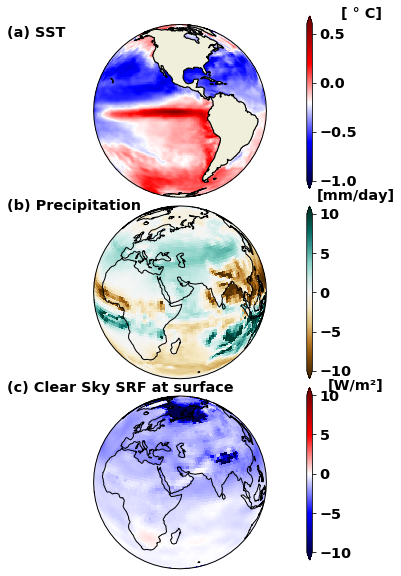

In [74]:
import cartopy as cart
sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1,0.1,0.8,0.2],projection=ccrs.Orthographic(50, 20))
ax2 = fig.add_axes([0.1,0.32,0.8,0.2],projection=ccrs.Orthographic(50, 20))
ax3 = fig.add_axes([0.1,0.53,0.8,0.2],projection=ccrs.Orthographic(-100, 0))

im3 = sst_diff1.plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
im2 = pr_diff.plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = ds_sfc.isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.72, 0.11, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='[W/m\N{SUPERSCRIPT TWO}]', size='large', weight='bold', y=1.05, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.72, 0.32, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='[mm/day]', size='large', weight='bold', y=1.1, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.72, 0.54, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='[ \N{DEGREE SIGN} C]', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.2,0.305, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.2,0.515, '(b) Precipitation', size='large', weight='bold')
fig.text(0.2,0.715, '(a) SST', size='large', weight='bold')

Text(0.15, 0.715, '(a) SST+TAS')

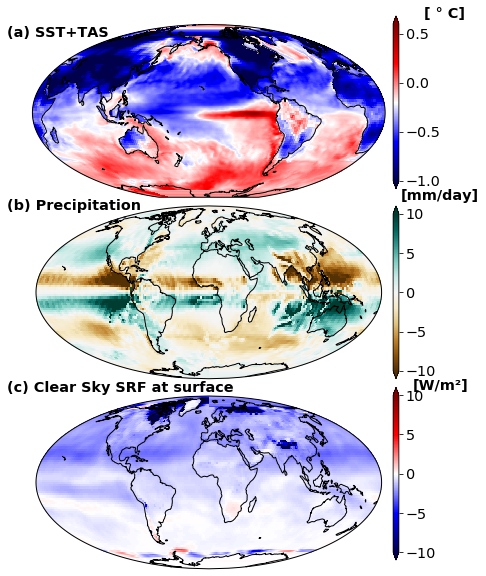

In [59]:
import cartopy as cart
sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1,0.1,0.8,0.2],projection=ccrs.Mollweide())
ax2 = fig.add_axes([0.1,0.32,0.8,0.2],projection=ccrs.Mollweide())
ax3 = fig.add_axes([0.1,0.53,0.8,0.2],projection=ccrs.Mollweide(210))

im3 = sst_tas.plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
im2 = pr_diff.plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = ds_sfc.isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.82, 0.11, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='[W/m\N{SUPERSCRIPT TWO}]', size='large', weight='bold', y=1.05, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.82, 0.32, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='[mm/day]', size='large', weight='bold', y=1.1, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.82, 0.54, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='[ \N{DEGREE SIGN} C]', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.15,0.305, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.15,0.515, '(b) Precipitation', size='large', weight='bold')
fig.text(0.15,0.715, '(a) SST+TAS', size='large', weight='bold')

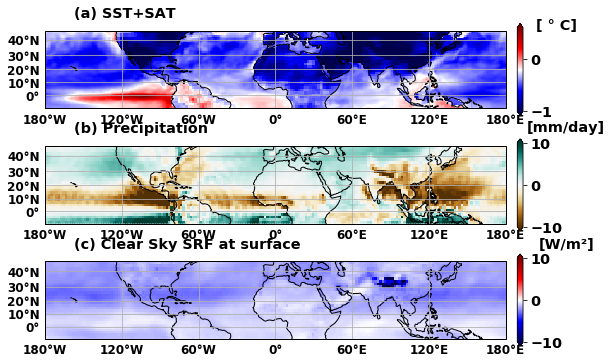

In [72]:
import cartopy as cart
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.11,0.8,0.2],projection=ccrs.Mercator())
ax2 = fig.add_axes([0.1,0.31,0.8,0.2],projection=ccrs.Mercator())
ax3 = fig.add_axes([0.1,0.51,0.8,0.2],projection=ccrs.Mercator())

im3 = sst_tas.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
#im2 = pr_diff.sel(lat=slice(45,-10)).plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())
im2 = pr_diff_interp.sel(lat=slice(45,-10)).plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())
#pr_diff_interp
im1 = ds_sfc.sel(lat=slice(45,-10)).isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.92, 0.13, 0.01, 0.16])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='[W/m\N{SUPERSCRIPT TWO}]', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.92, 0.33, 0.01, 0.16])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='[mm/day]', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.92, 0.53, 0.01, 0.16])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='[ \N{DEGREE SIGN} C]', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.15,0.30, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.15,0.50, '(b) Precipitation', size='large', weight='bold')
fig.text(0.15,0.70, '(a) SST+SAT', size='large', weight='bold')

#     def prettify(ax):
# #ax.text(90, 5, "test", fontsize=12)
#         gl = ax.gridlines()
#         gl.xlabels_bottom = True
#         gl.ylabels_left = True
#         gl.xformatter = LONGITUDE_FORMATTER
#         gl.yformatter = LATITUDE_FORMATTER
#         gl.xlabel_style = {'size': 'medium'}
#         gl.ylabel_style = {'size': 'medium'}
#         ax.text(-0.15, 0.55,"Latitude [degrees_north]", va='bottom', ha='center',
#                 rotation='vertical', rotation_mode='anchor',
#                 transform=ax.transAxes, size='x-large')
#         ax.text(0.5, -0.2, "Longitude [degrees_east]", va='bottom', ha='center',
#                 rotation='horizontal', rotation_mode='anchor',
#                 transform=ax.transAxes, size='x-large')
for ax in [ax1,ax2,ax3]:
    gl = ax.gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


In [69]:
import xesmf as xe
pr_diff_interp = xr.Dataset({'lat': (['lat'], np.arange(88.5, -88.5, -0.25)),
                     'lon': (['lon'], np.arange(-150, 210, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff, pr_diff_interp, 'bilinear')

Create weight file: bilinear_94x192_708x1440.nc


In [70]:
regridder.clean_weight_file()

Remove file bilinear_94x192_708x1440.nc


In [71]:
pr_diff_interp = regridder(pr_diff)
ds_sfc_interp = regridder(ds_sfc)
#sst_tas_interp = regridder(sst_tas)
#print(pr_diff_interp)

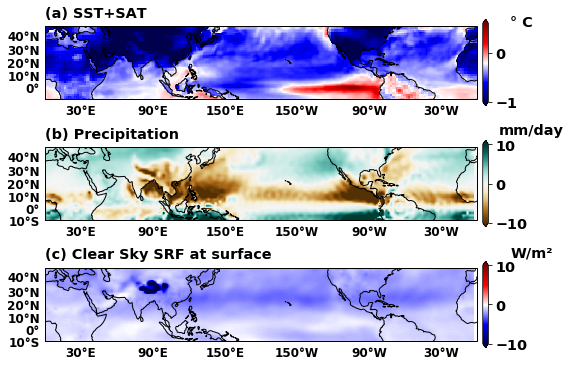

In [97]:
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point

sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))



im3 = sst_tas.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
im2 = pr_diff_interp.sel(lat=slice(45,-10)).plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = ds_sfc_interp.sel(lat=slice(45,-10)).isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+SAT', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
#     gl.ylines = True
#     gl.xlines = True    
pl.savefig('fig5.png', format='png', dpi=1000)

In [55]:
data_dir = 'sigl.nc'  # daily
ds_nh_cool = xr.open_dataset(data_dir)

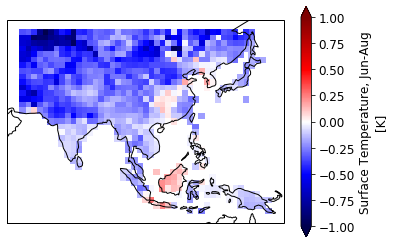

In [68]:
import cartopy.crs as ccrs
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())
ds_nh_cool.tsurf.plot(ax=ax1, vmin=-1.0, vmax=1.0, extend='both', cmap='seismic')
ax1.set_title('')
ax1.coastlines()